In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Connect to your local invoice parser DB
from config import DATABASE_URL
engine = create_engine(DATABASE_URL)

# Load all invoice data into a DataFrame
df = pd.read_sql("SELECT * FROM invoices", engine)
df.head()


id  file_name              invoice_number invoice_date total_amount  \
0   1    348.png                      567181   25.04.1999      £547.31   
1   2  60413.png                   6433-2056   20.03.2012       444.68   
2   3  20037.png  25237 Hurley Road Apt. 929   31.08.2021       201.12   
3   4  30224.png                Wq-6619-6146   20.07.2003      -301.38   
4   5  60375.png                   1465-5545   03.09.2009       475.26   

                     vendor_name  \
0  Faulkner-Mendez Nicole Bryant   
1                         197.07   
2       quinnfelicia@example.org   
3        Gomez, Gibson and Garza   
4                          213.5   

                                     billing_address  \
0  0541 Vanessa Glen Garrettshire, AR 27907 Puert...   
1                             \Wigginstown, IL 98703   
2  389 Michael Station Apt. 584 Frenchburgh, MH 0...   
3                           63150 Chandler Mountains   
4                     709 Jonathan Estates Suite 264   

                                    shipping_address created_at  
0  0541 Vanessa Glen Garrettshire, AR 27907 Puert...       None  
1                                729 Brian Junctions       None  
2  389 Michael Station Apt. 584 Frenchburgh, MH 0...       None  
3                                       Saint Helena       None  
4                     709 Jonathan Estates Suite 264       None

In [7]:
def search_invoices(keyword):
    # Look for the keyword across all columns (case-insensitive)
    mask = df.apply(lambda row: row.astype(str).str.contains(str(keyword), case=False, na=False)).any(axis=1)
    results = df[mask]
    count = len(results)
    
    print(f"📄 {count} invoice(s) found containing: \"{keyword}\"\n")
    display(results[['invoice_number', 'vendor_name', 'total_amount', 'invoice_date', 'file_name']])

    if count > 0:
        print("\n🤖 Do you want me to provide the invoice images for these results?")
    else:
        print("\n🤖 No invoices matched that input. Try a different keyword.")


In [8]:
search_invoices("Hayes")

📄 28 invoice(s) found containing: "Hayes"



invoice_number                  vendor_name total_amount  \
281                         249642                 Hayes-Nelson      £678.75   
668                         802205  Hayes LLC Mercedes Martinez      £534.11   
946                   HM-4564-0193                  Adams Group       “16.43   
1123                        407714                  Tammy Hayes       680.93   
1669                        684815                Johns-Ramirez      £703.19   
2381                  Cp-1456-5582               Christina Gray    -497.42 €   
2398                        237201   Thompson-Howard Adam Singh       £409.0   
2638  97782 Hayes Summit Suite 987                 Ryan Roberts       343.26   
2745  997 Serrano Mission Apt. 922           vhayes@example.com       349.25   
3318                        843308                 Ashley Hayes      £672.81   
3395                        972030                   Cruz-Hayes      £241.13   
3647               #nGC63160207056      hayesnathan@example.com       185.07   
4203                         28812                Kathryn Hayes       182.38   
4431                     0478-2222                       423.08       462.42   
4441                         23.63                Kathryn Hayes        79.04   
4769                  vV-3007-1317               Hayes and Sons      -278.33   
4839                     5273-7146                       220.77       284.58   
5066                     6780-5108                194.51 140.02       406.76   
5488               #FEg27630259259            Michael Rodriguez       482.77   
5623                     4740-9899                         9000       444.09   
5823                        376549                Timothy Hayes       644.66   
6189                  tU-5447-0235    Hayes, Joseph and Shelton       181.71   
6275                  xf-5830-5943                    Hayes-Roy      -392.03   
6329                        825363              Mrs. Lisa Hayes       316.65   
6383                        309404                  Port Patty,       102.93   
6771                        268.05                  Keith Hayes       358.74   
7001                        802205  Hayes LLC Mercedes Martinez      £534.11   
7002                        802205  Hayes LLC Mercedes Martinez       534.11   

               invoice_date  file_name  
281              07.10.2022    617.png  
668              05.08.2007    001.png  
946              07.10.2020  30779.png  
1123             22.02.1999  10496.png  
1669             12.01.2012    947.png  
2381             15.02.2020  30085.png  
2398             08.02.2001    710.png  
2638             28.01.2009  50775.png  
2745             22.12.1993  20091.png  
3318             16.06.2022    717.png  
3395             26.08.2011    139.png  
3647             14.04.1990  20471.png  
4203             30.08.1997  50368.png  
4431             14.03.2007  60457.png  
4441             19.05.2006  50231.png  
4769             09.09.1995  30539.png  
4839             09.05.2023  60656.png  
5066             03.12.2004  60079.png  
5488             25.03.2022  20349.png  
5623             02.03.2005  60369.png  
5823             08.05.2022  10539.png  
6189             07.11.2006  30015.png  
6275             14.06.2000  30161.png  
6329  09.09.1992 15.11.2000  10065.png  
6383             19.05.1999  40646.png  
6771             06.04.2011  50495.png  
7001             05.08.2007    001.png  
7002             2007-08-05    001.png


🤖 Do you want me to provide the invoice images for these results?


In [9]:
search_invoices("802205")
search_invoices("534.11")
search_invoices("Martinez")

📄 4 invoice(s) found containing: "802205"



invoice_number                  vendor_name total_amount invoice_date  \
668          802205  Hayes LLC Mercedes Martinez      £534.11   05.08.2007   
5547         802205                         None       534.11   2007-08-05   
7001         802205  Hayes LLC Mercedes Martinez      £534.11   05.08.2007   
7002         802205  Hayes LLC Mercedes Martinez       534.11   2007-08-05   

     file_name  
668    001.png  
5547   001.png  
7001   001.png  
7002   001.png


🤖 Do you want me to provide the invoice images for these results?
📄 4 invoice(s) found containing: "534.11"



invoice_number                  vendor_name total_amount invoice_date  \
668          802205  Hayes LLC Mercedes Martinez      £534.11   05.08.2007   
5547         802205                         None       534.11   2007-08-05   
7001         802205  Hayes LLC Mercedes Martinez      £534.11   05.08.2007   
7002         802205  Hayes LLC Mercedes Martinez       534.11   2007-08-05   

     file_name  
668    001.png  
5547   001.png  
7001   001.png  
7002   001.png


🤖 Do you want me to provide the invoice images for these results?
📄 63 invoice(s) found containing: "Martinez"



invoice_number                  vendor_name     total_amount  \
86           984964              Heather Stewart          £877.78   
212       0463-1240                       276.86           578.56   
310          365.76             Cindy Montgomery            76.96   
380          263909                    Young Ltd           £973.9   
507    cm-1766-0565             Johnson-Martinez  -201.05 € -12.3   
...             ...                          ...              ...   
6728         468.13             Joseph Rodriguez           161.69   
6761         228076             Katherine Martin           106.33   
6817   oJ-1457-2612  Martinez, Beck and Robinson           -338.8   
7001         802205  Hayes LLC Mercedes Martinez          £534.11   
7002         802205  Hayes LLC Mercedes Martinez           534.11   

     invoice_date  file_name  
86     14.02.2013    823.png  
212    19.10.2001  60201.png  
310    19.11.2003  50112.png  
380    15.06.2015    822.png  
507    09.12.2002  30209.png  
...           ...        ...  
6728   28.06.2018  50127.png  
6761   16.05.2012  50330.png  
6817   28.03.1996  30361.png  
7001   05.08.2007    001.png  
7002   2007-08-05    001.png  

[63 rows x 5 columns]


🤖 Do you want me to provide the invoice images for these results?


In [10]:
from IPython.display import Image, display

def show_invoice_images(file_list, image_dir="data/images"):
    print("🖼️ Showing invoice images...")
    for fname in file_list:
        path = f"{image_dir}/{fname}"
        display(Image(filename=path))


🖼️ Showing invoice images...


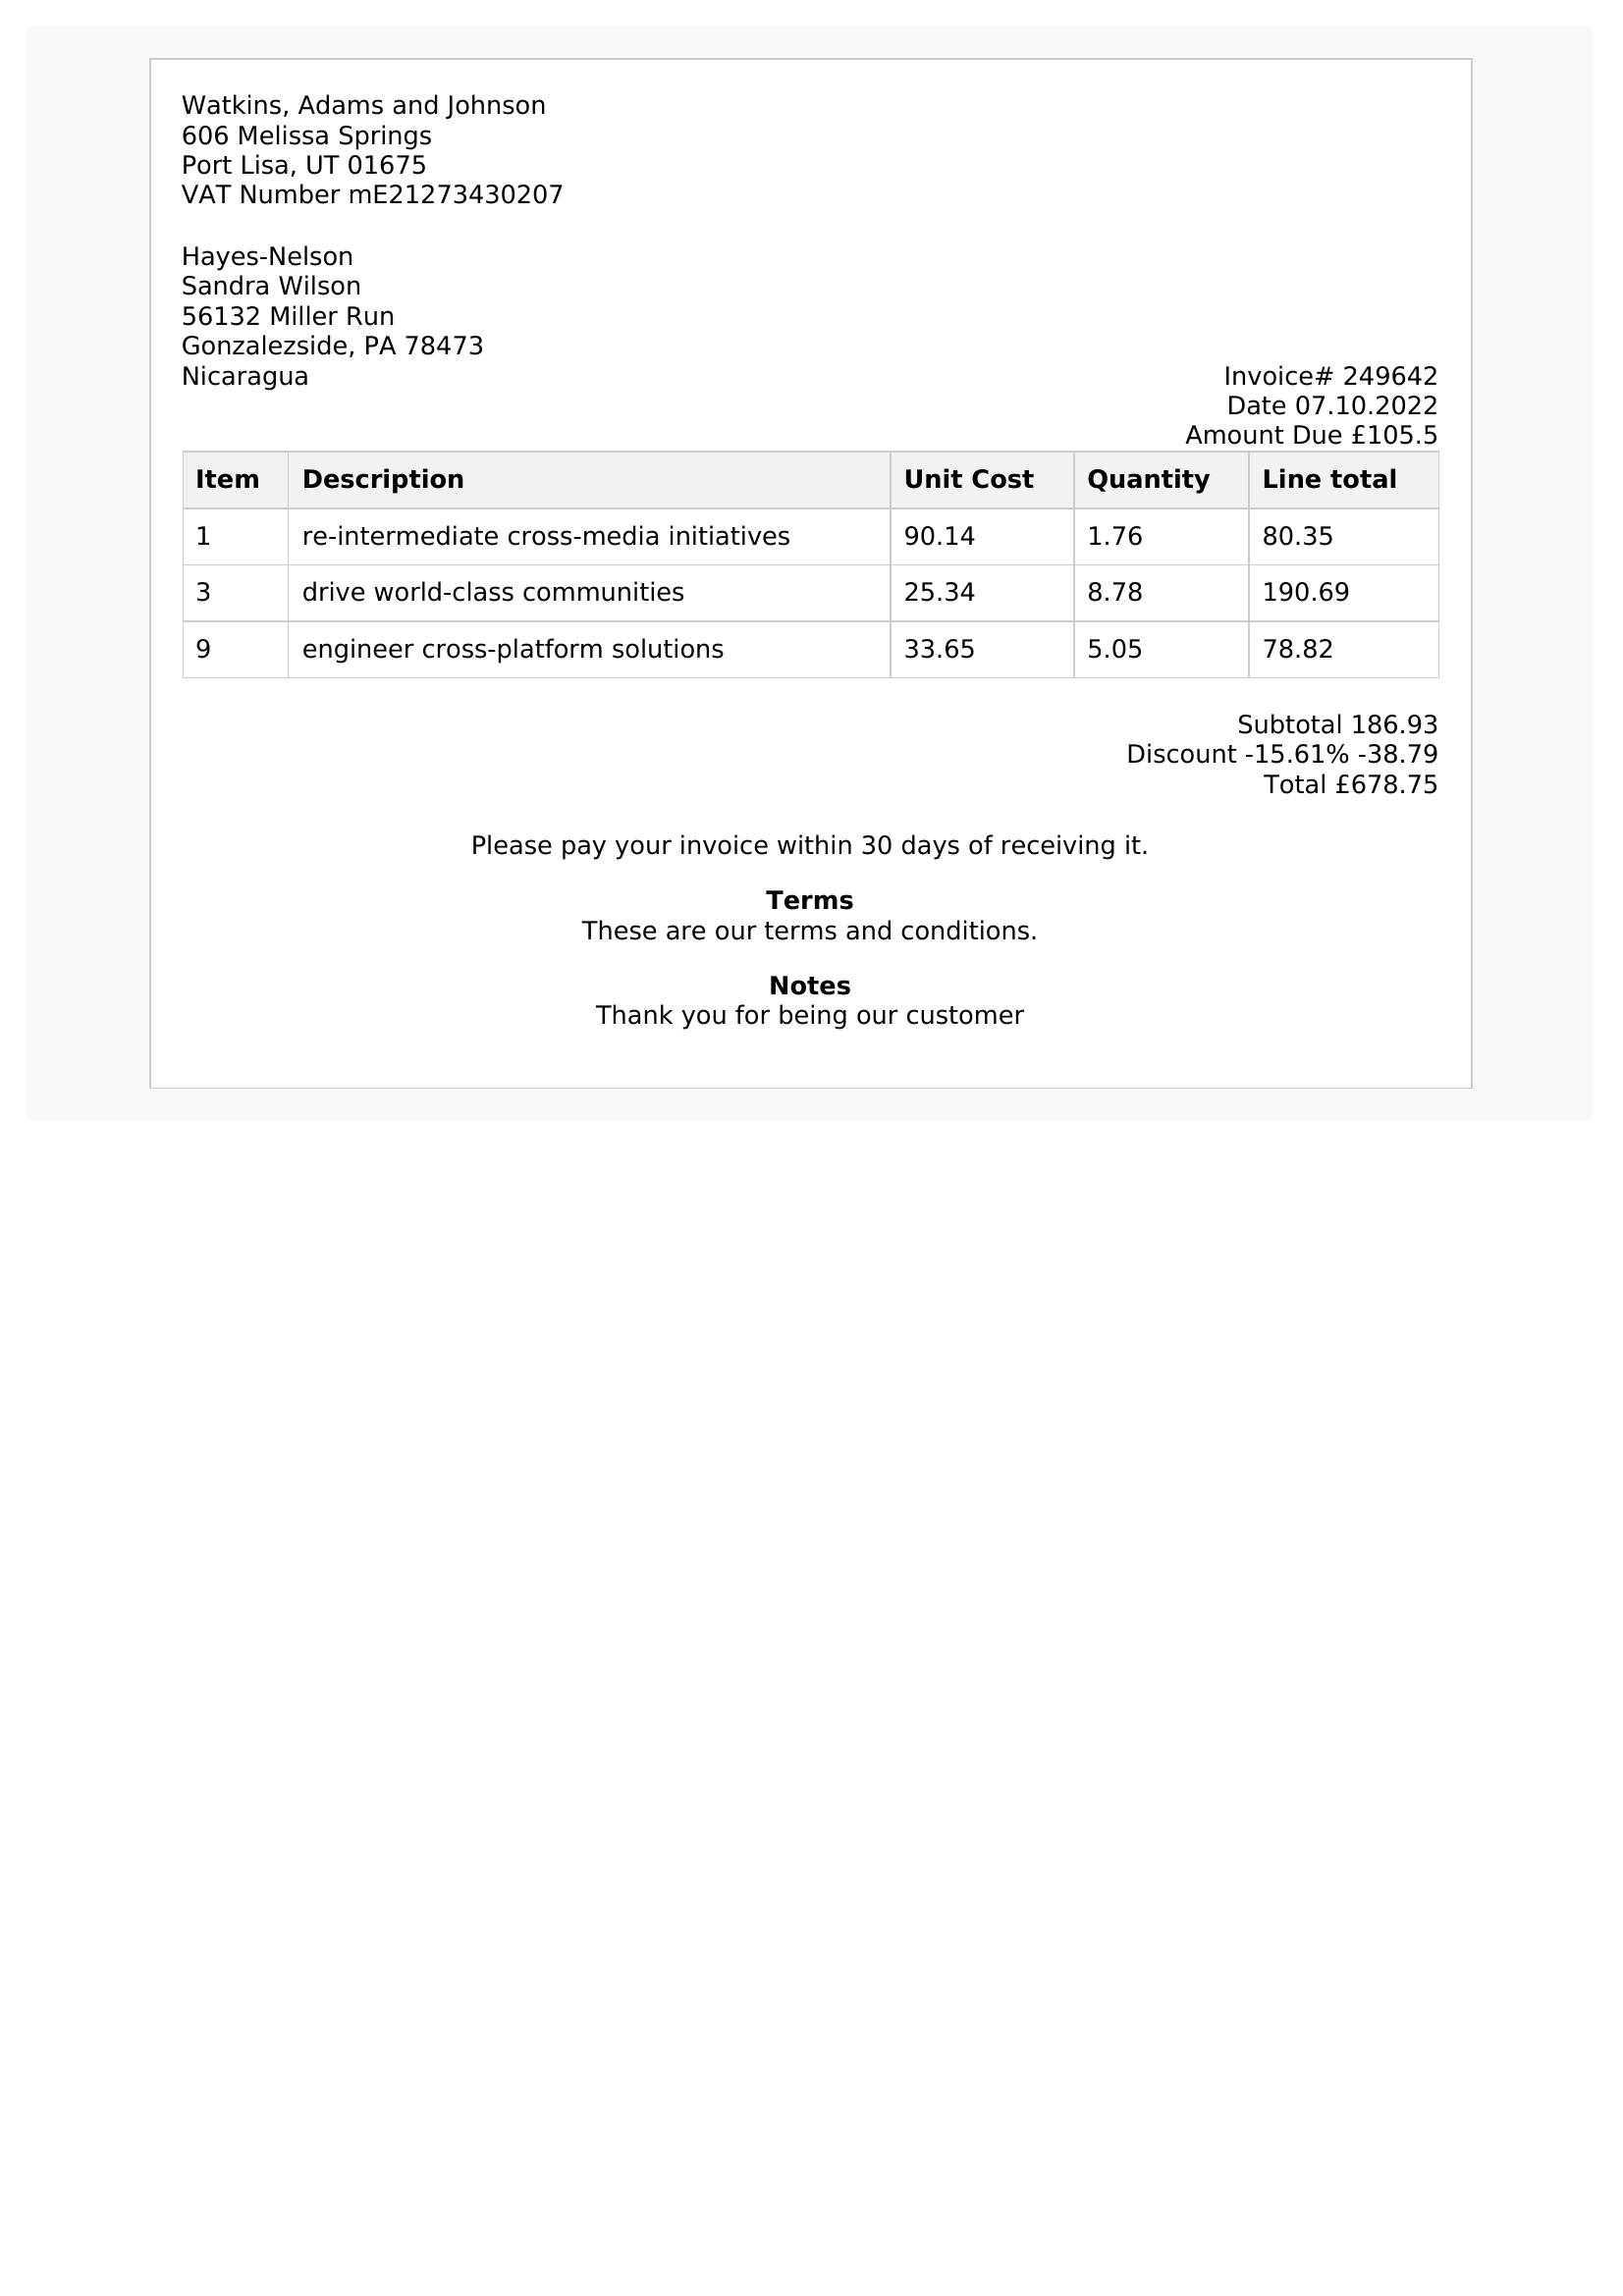

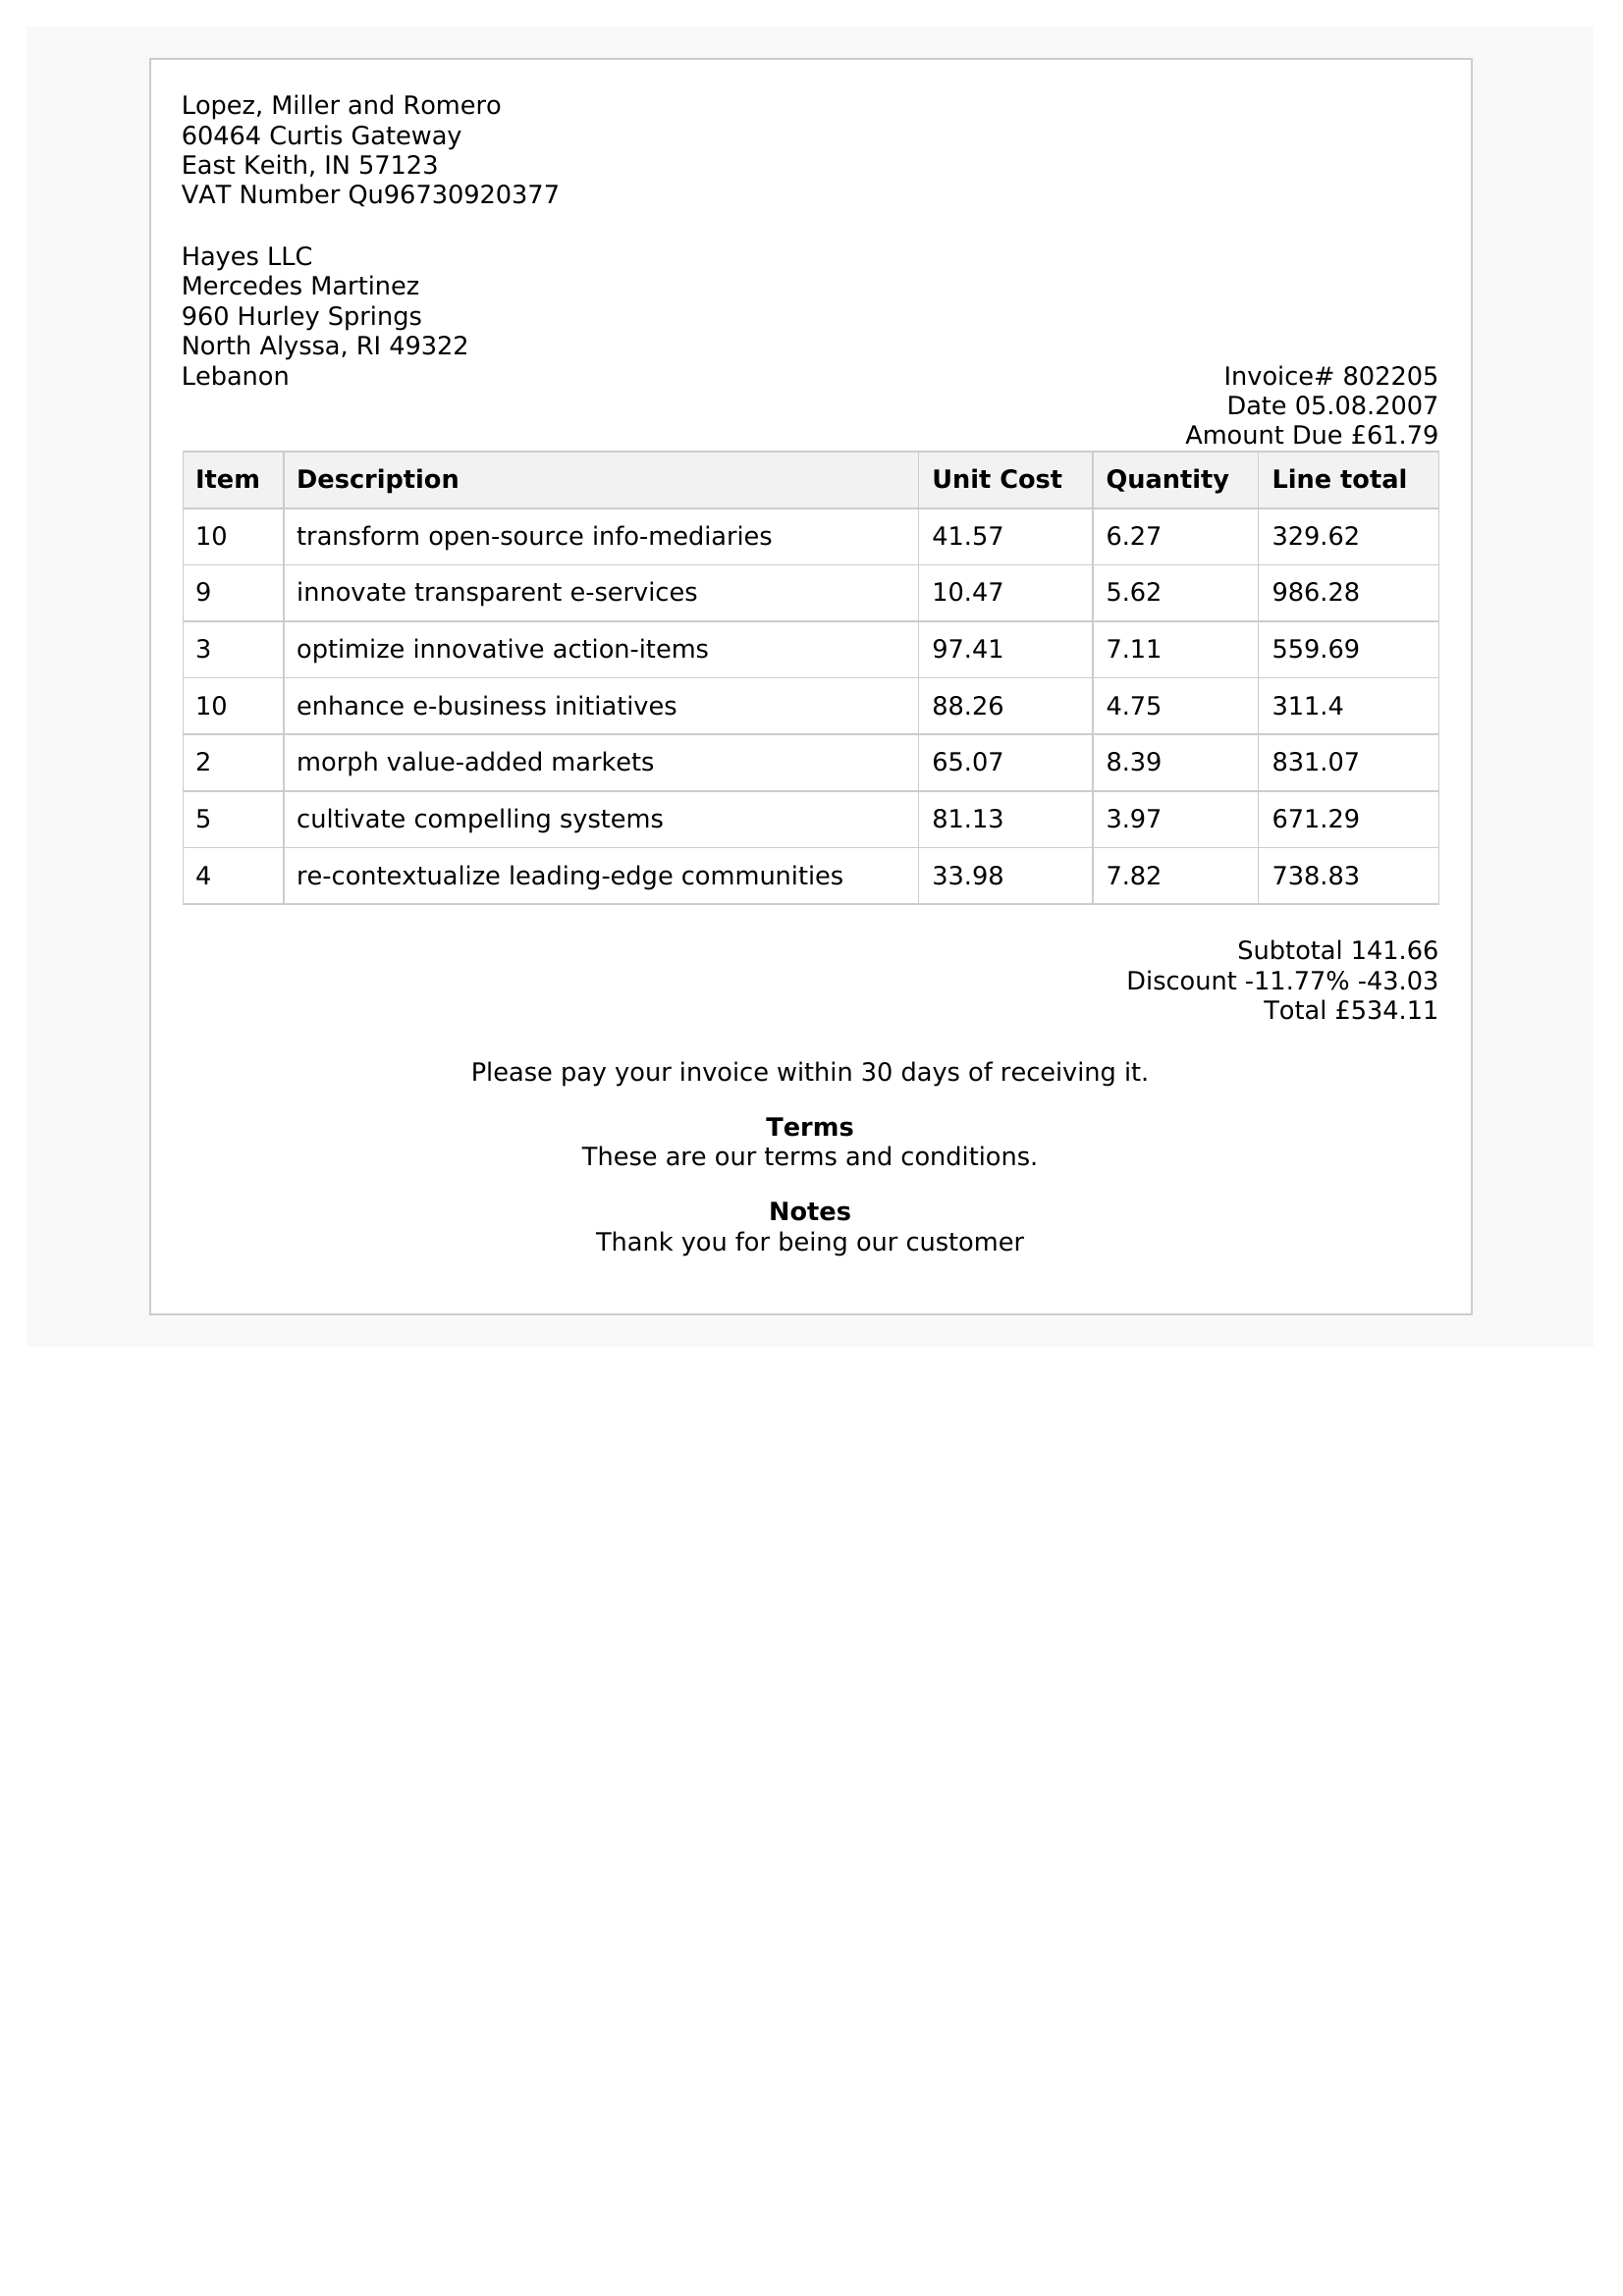

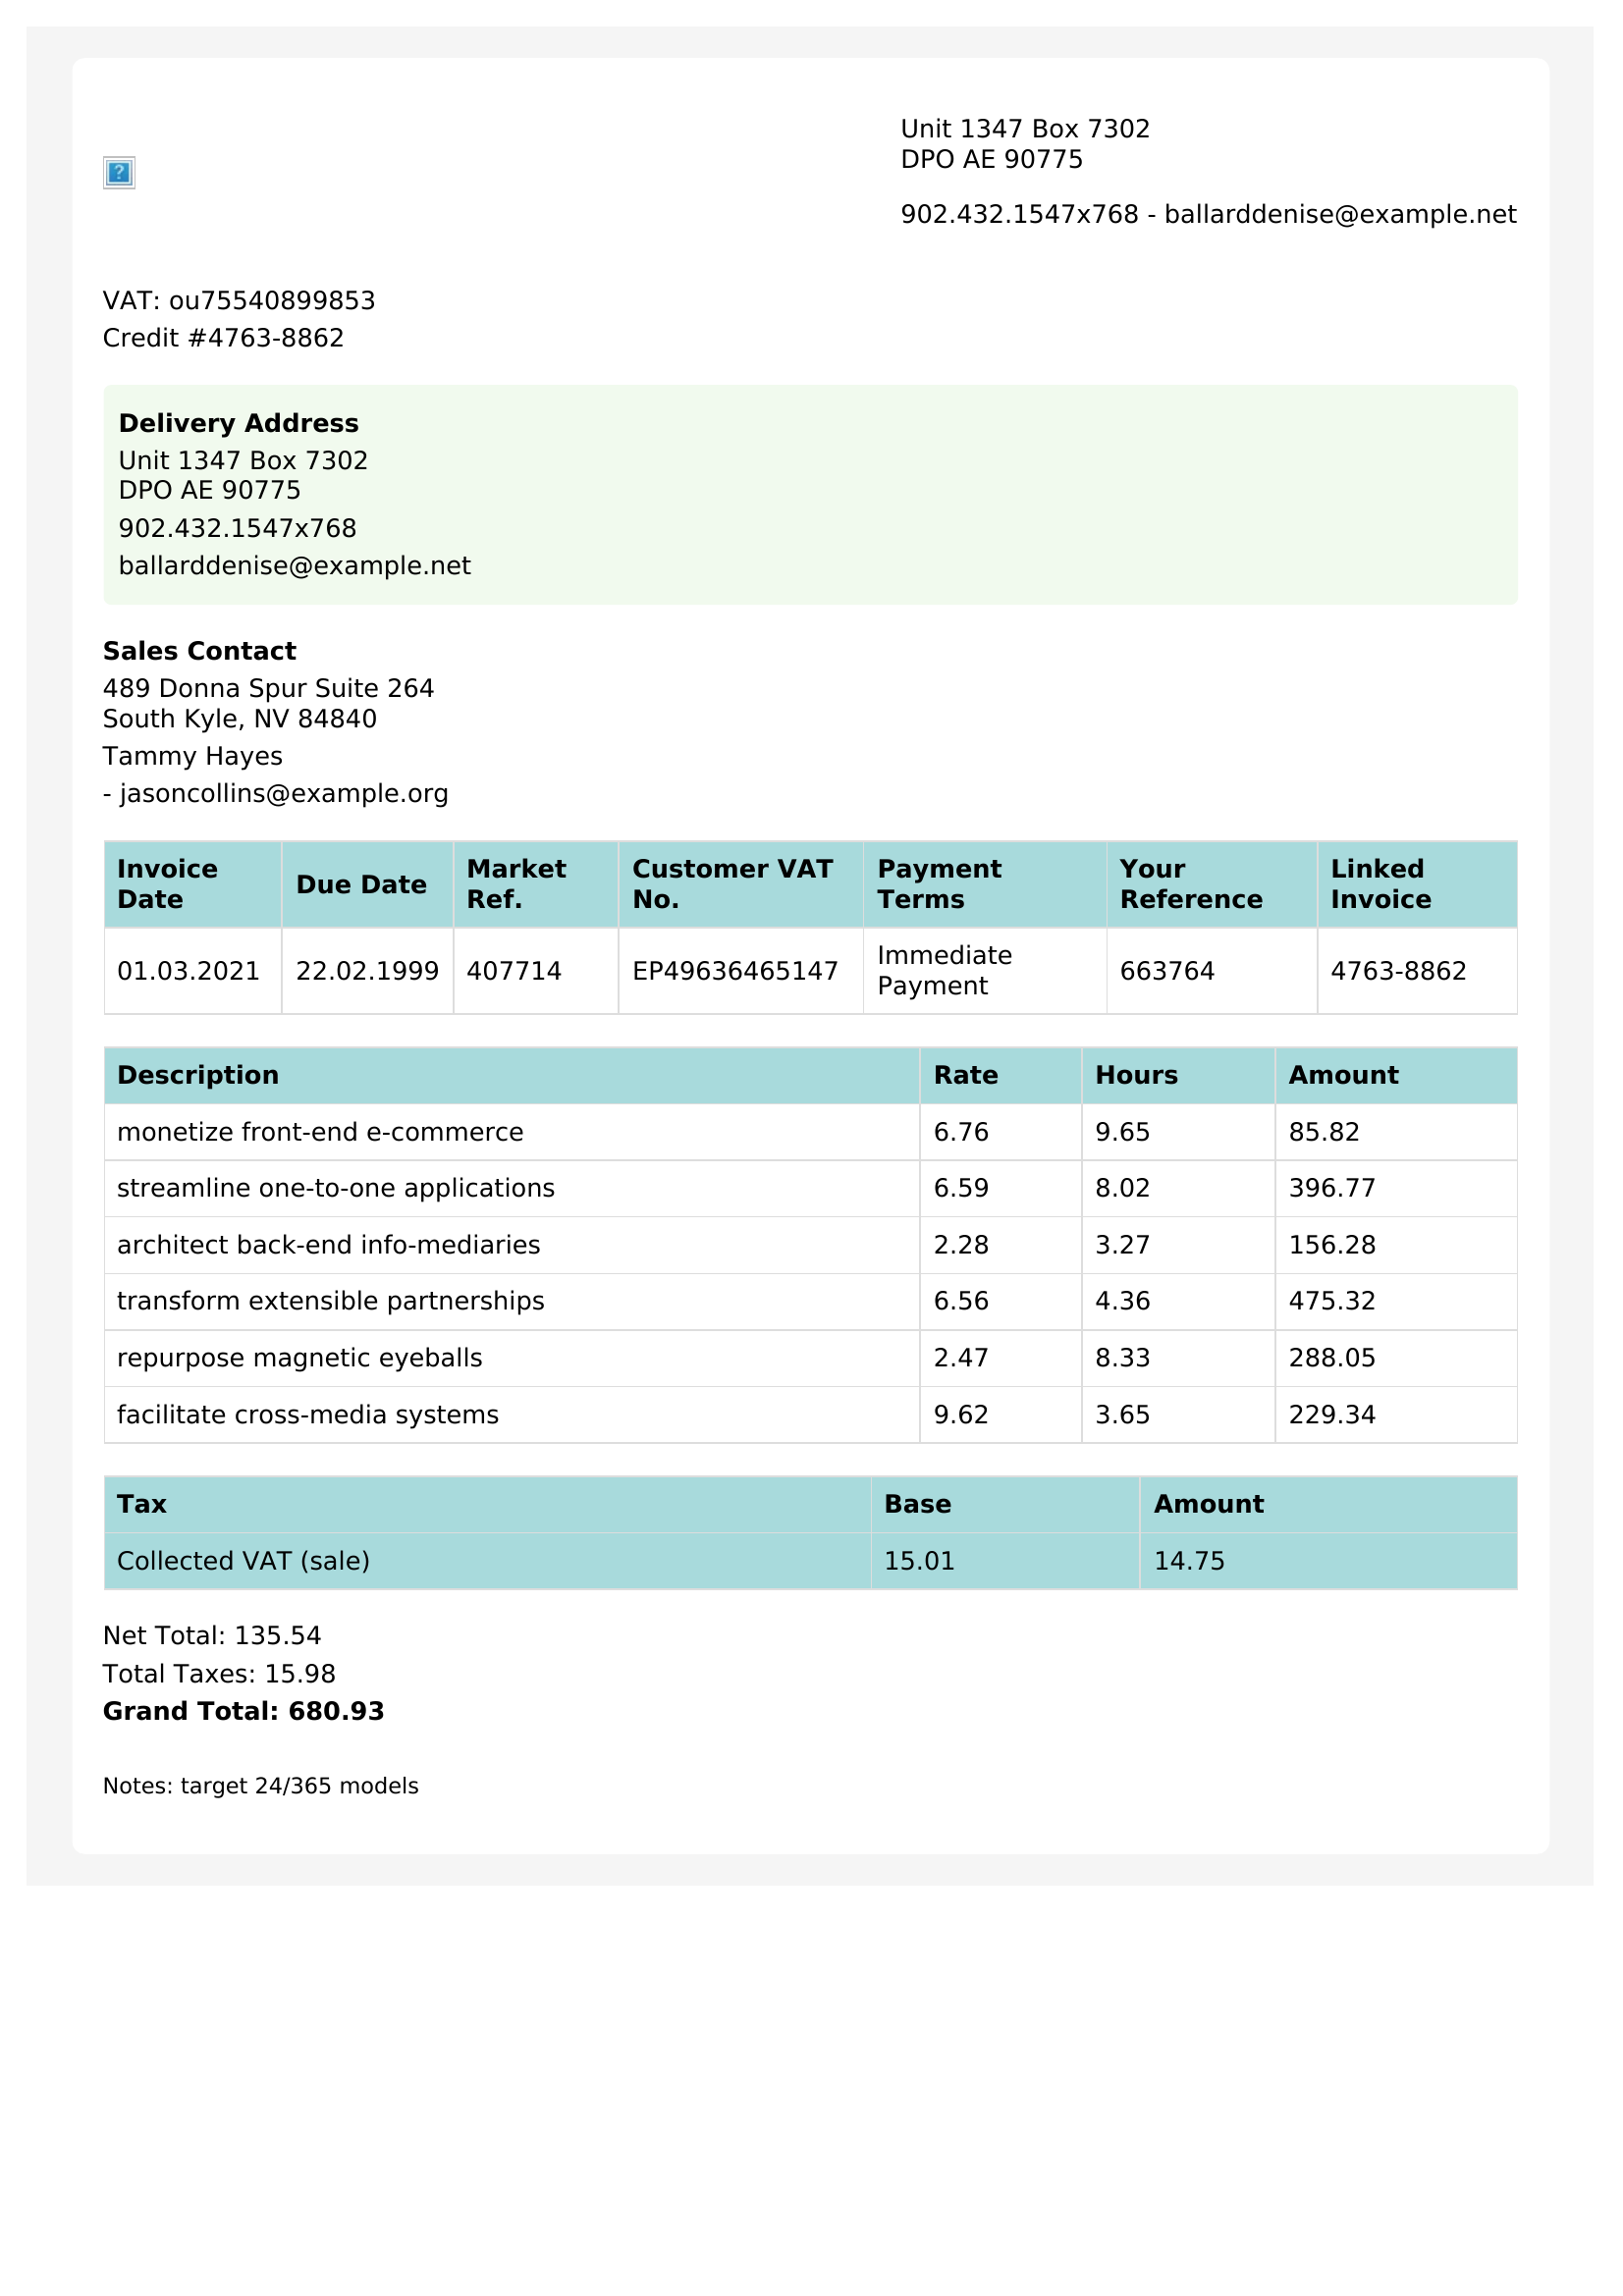

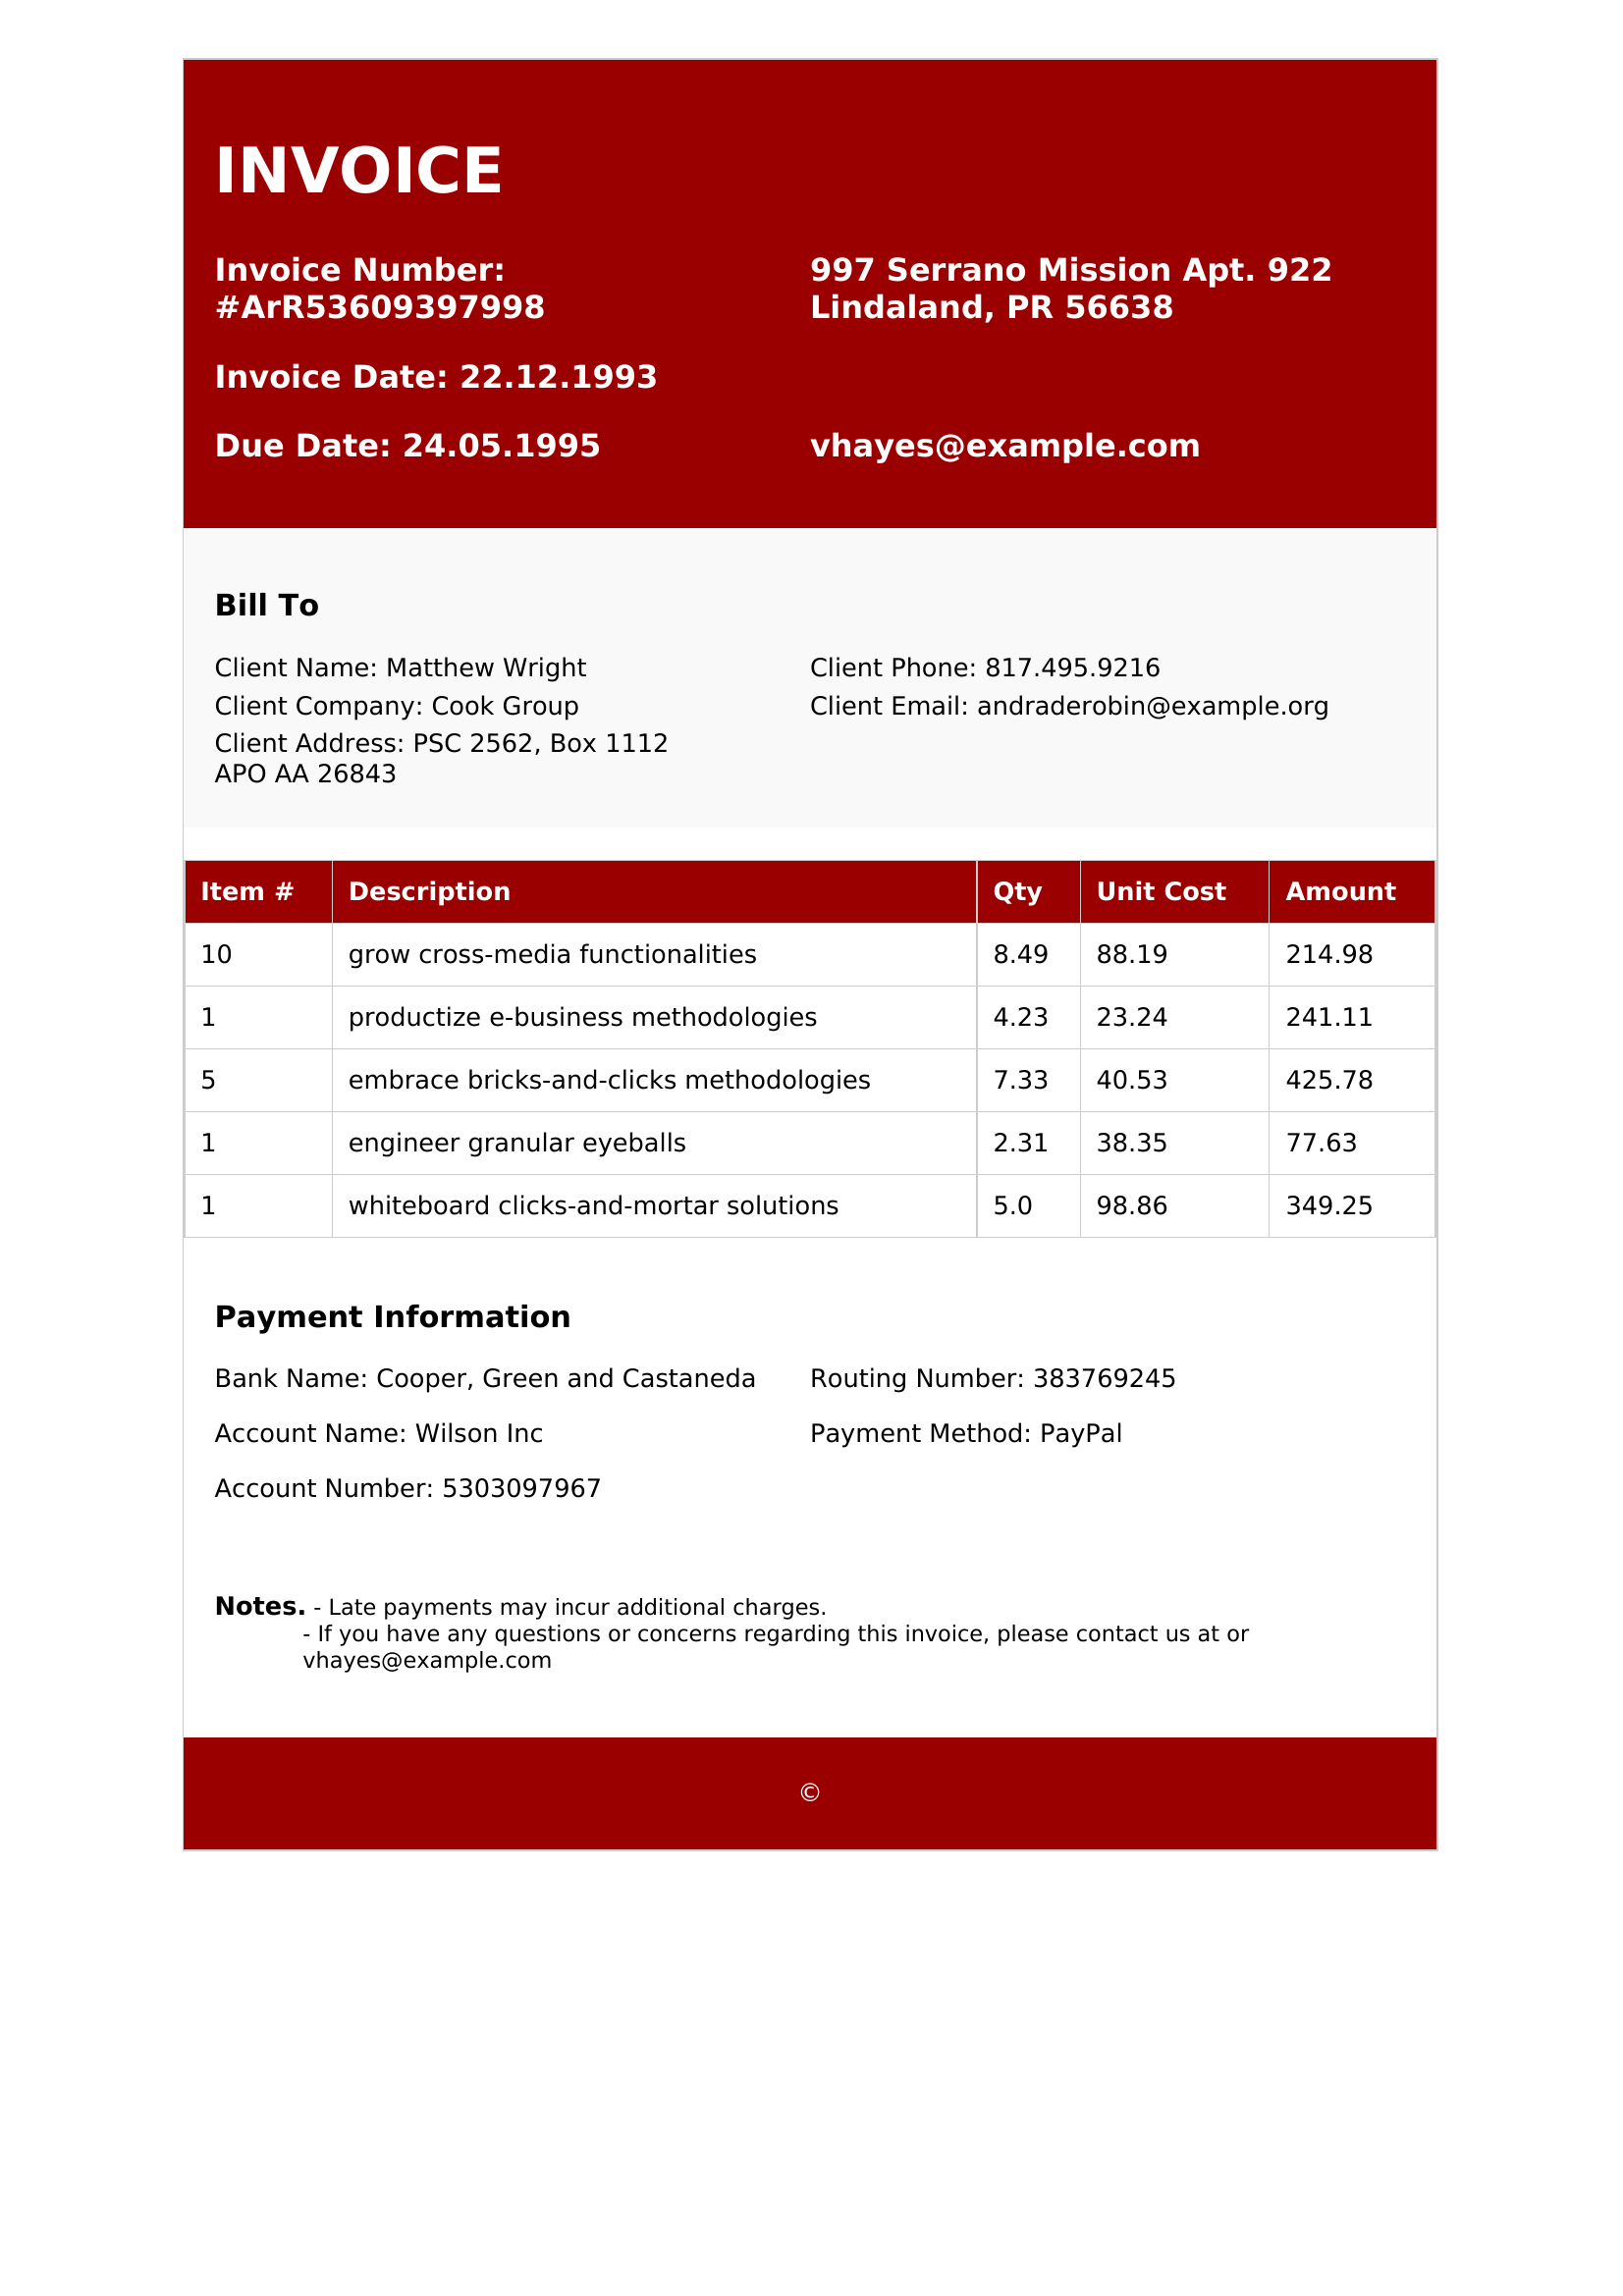

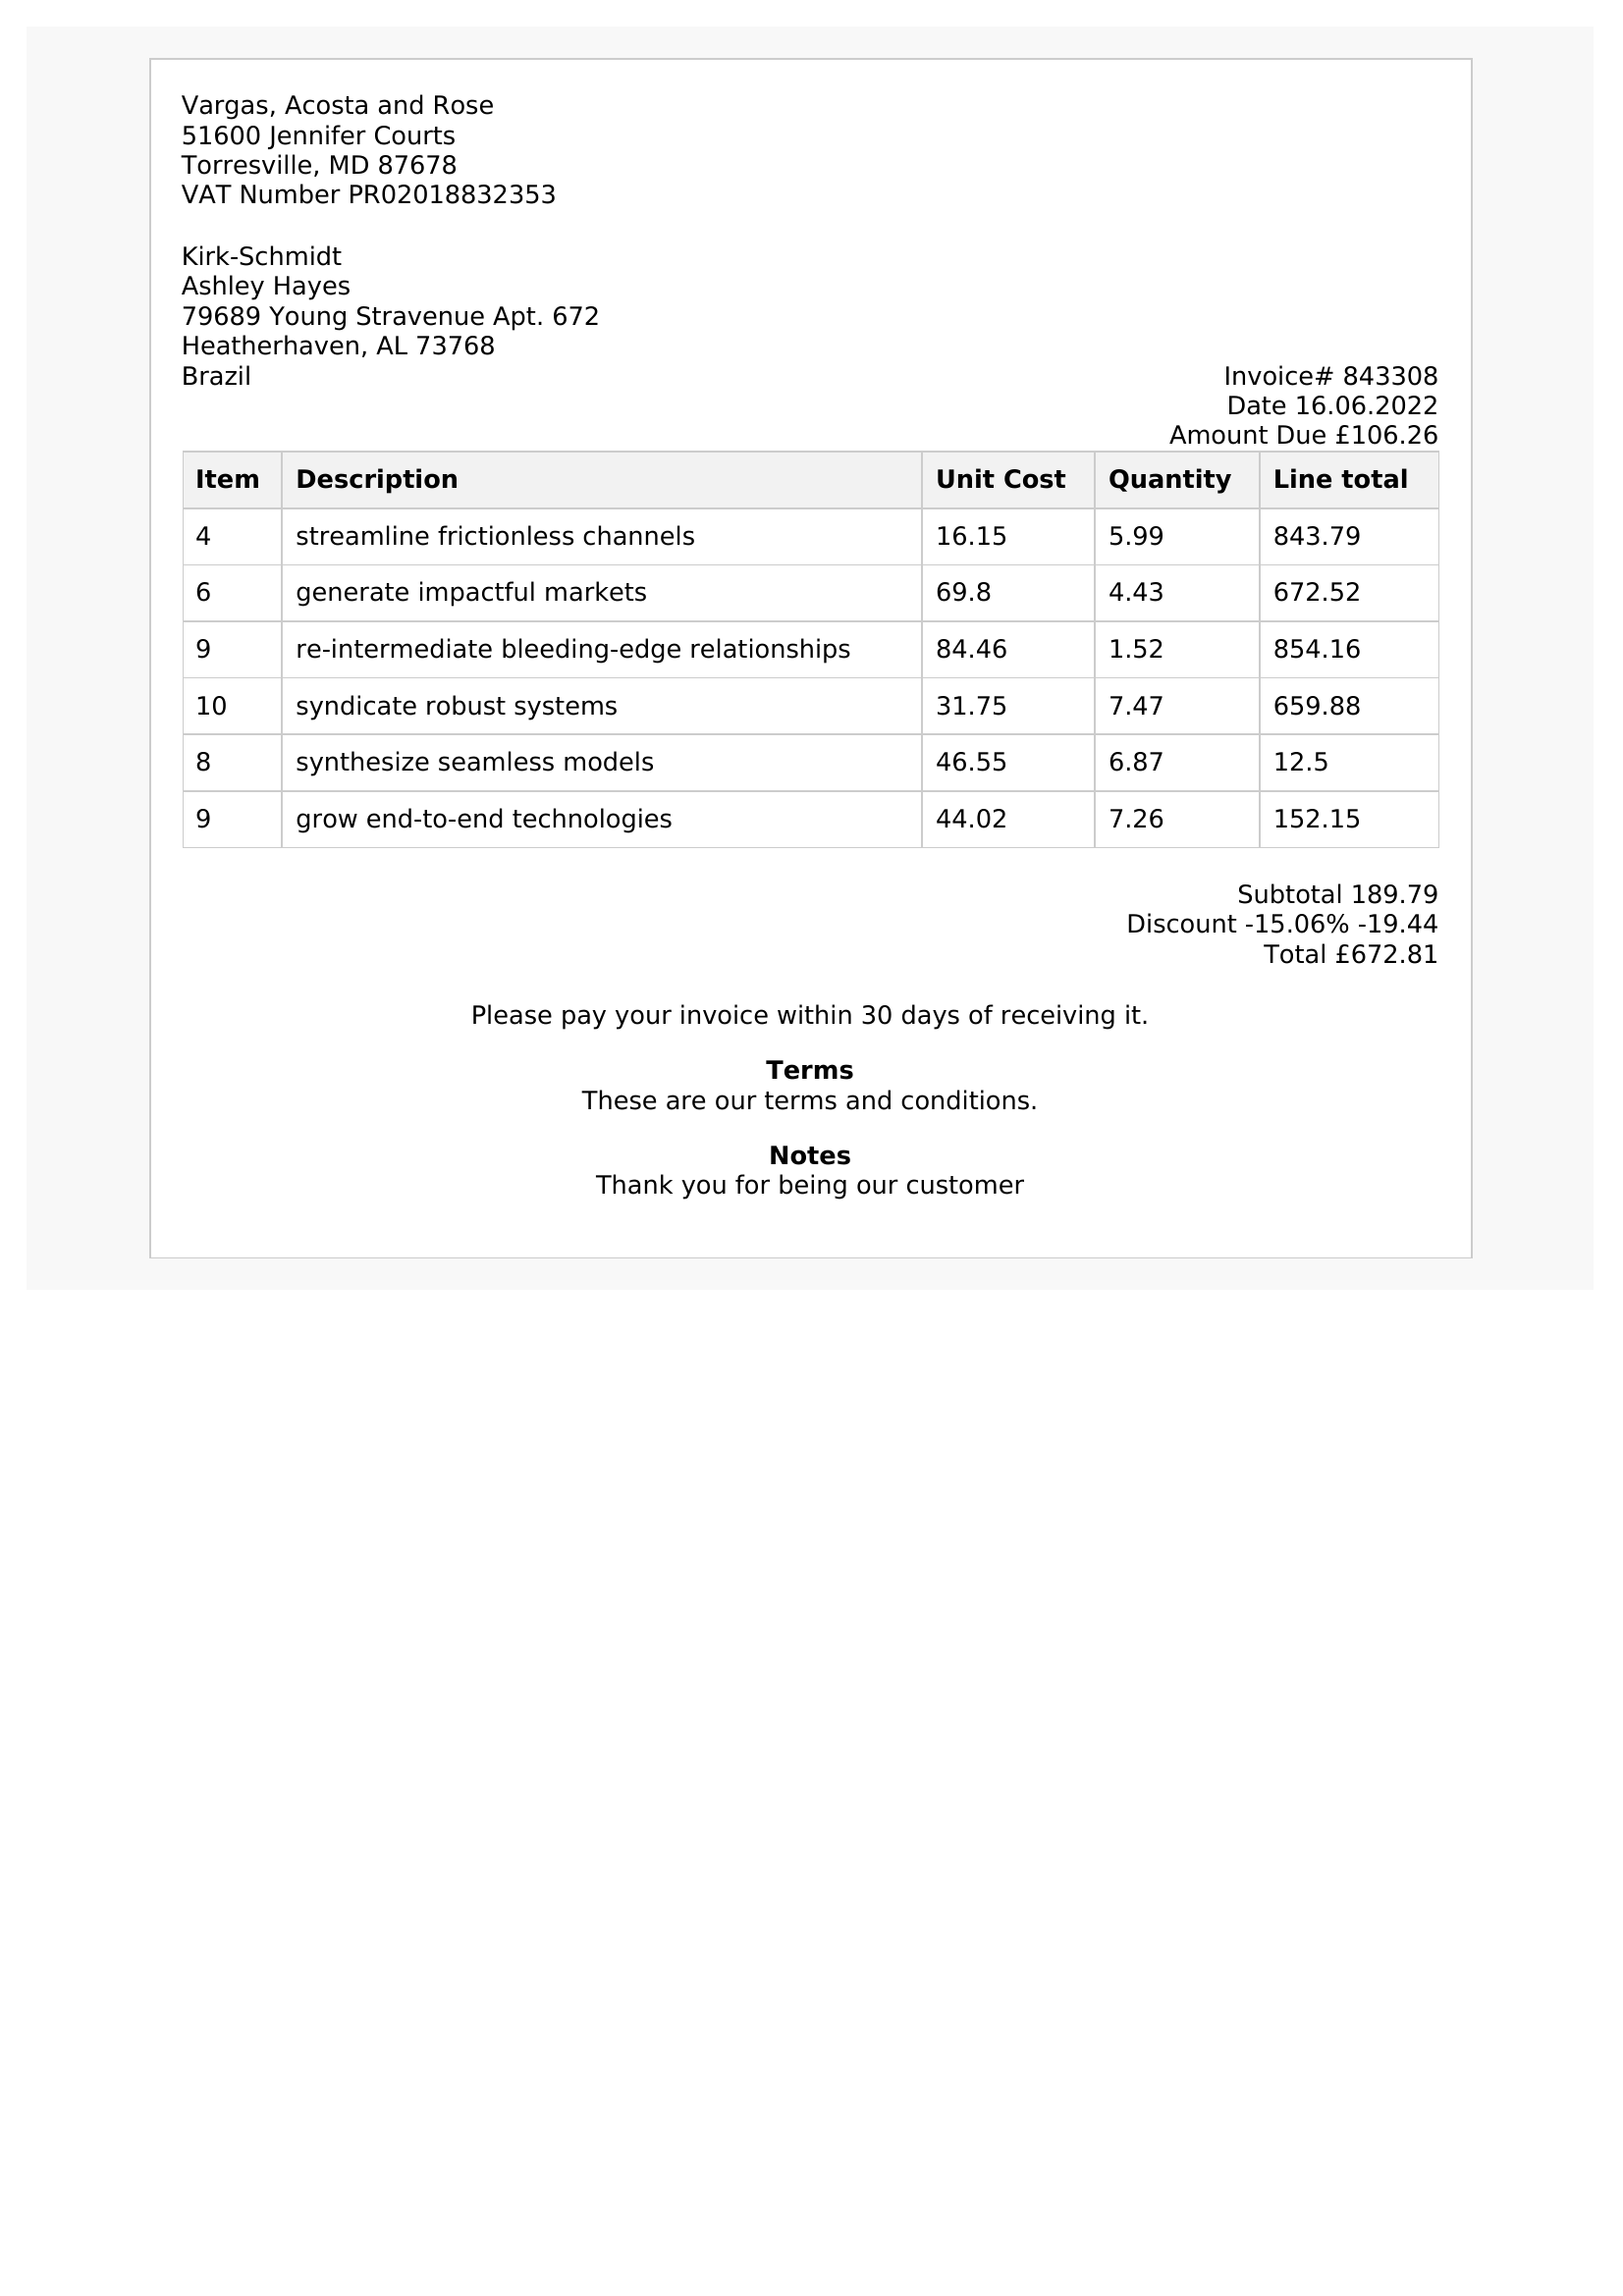

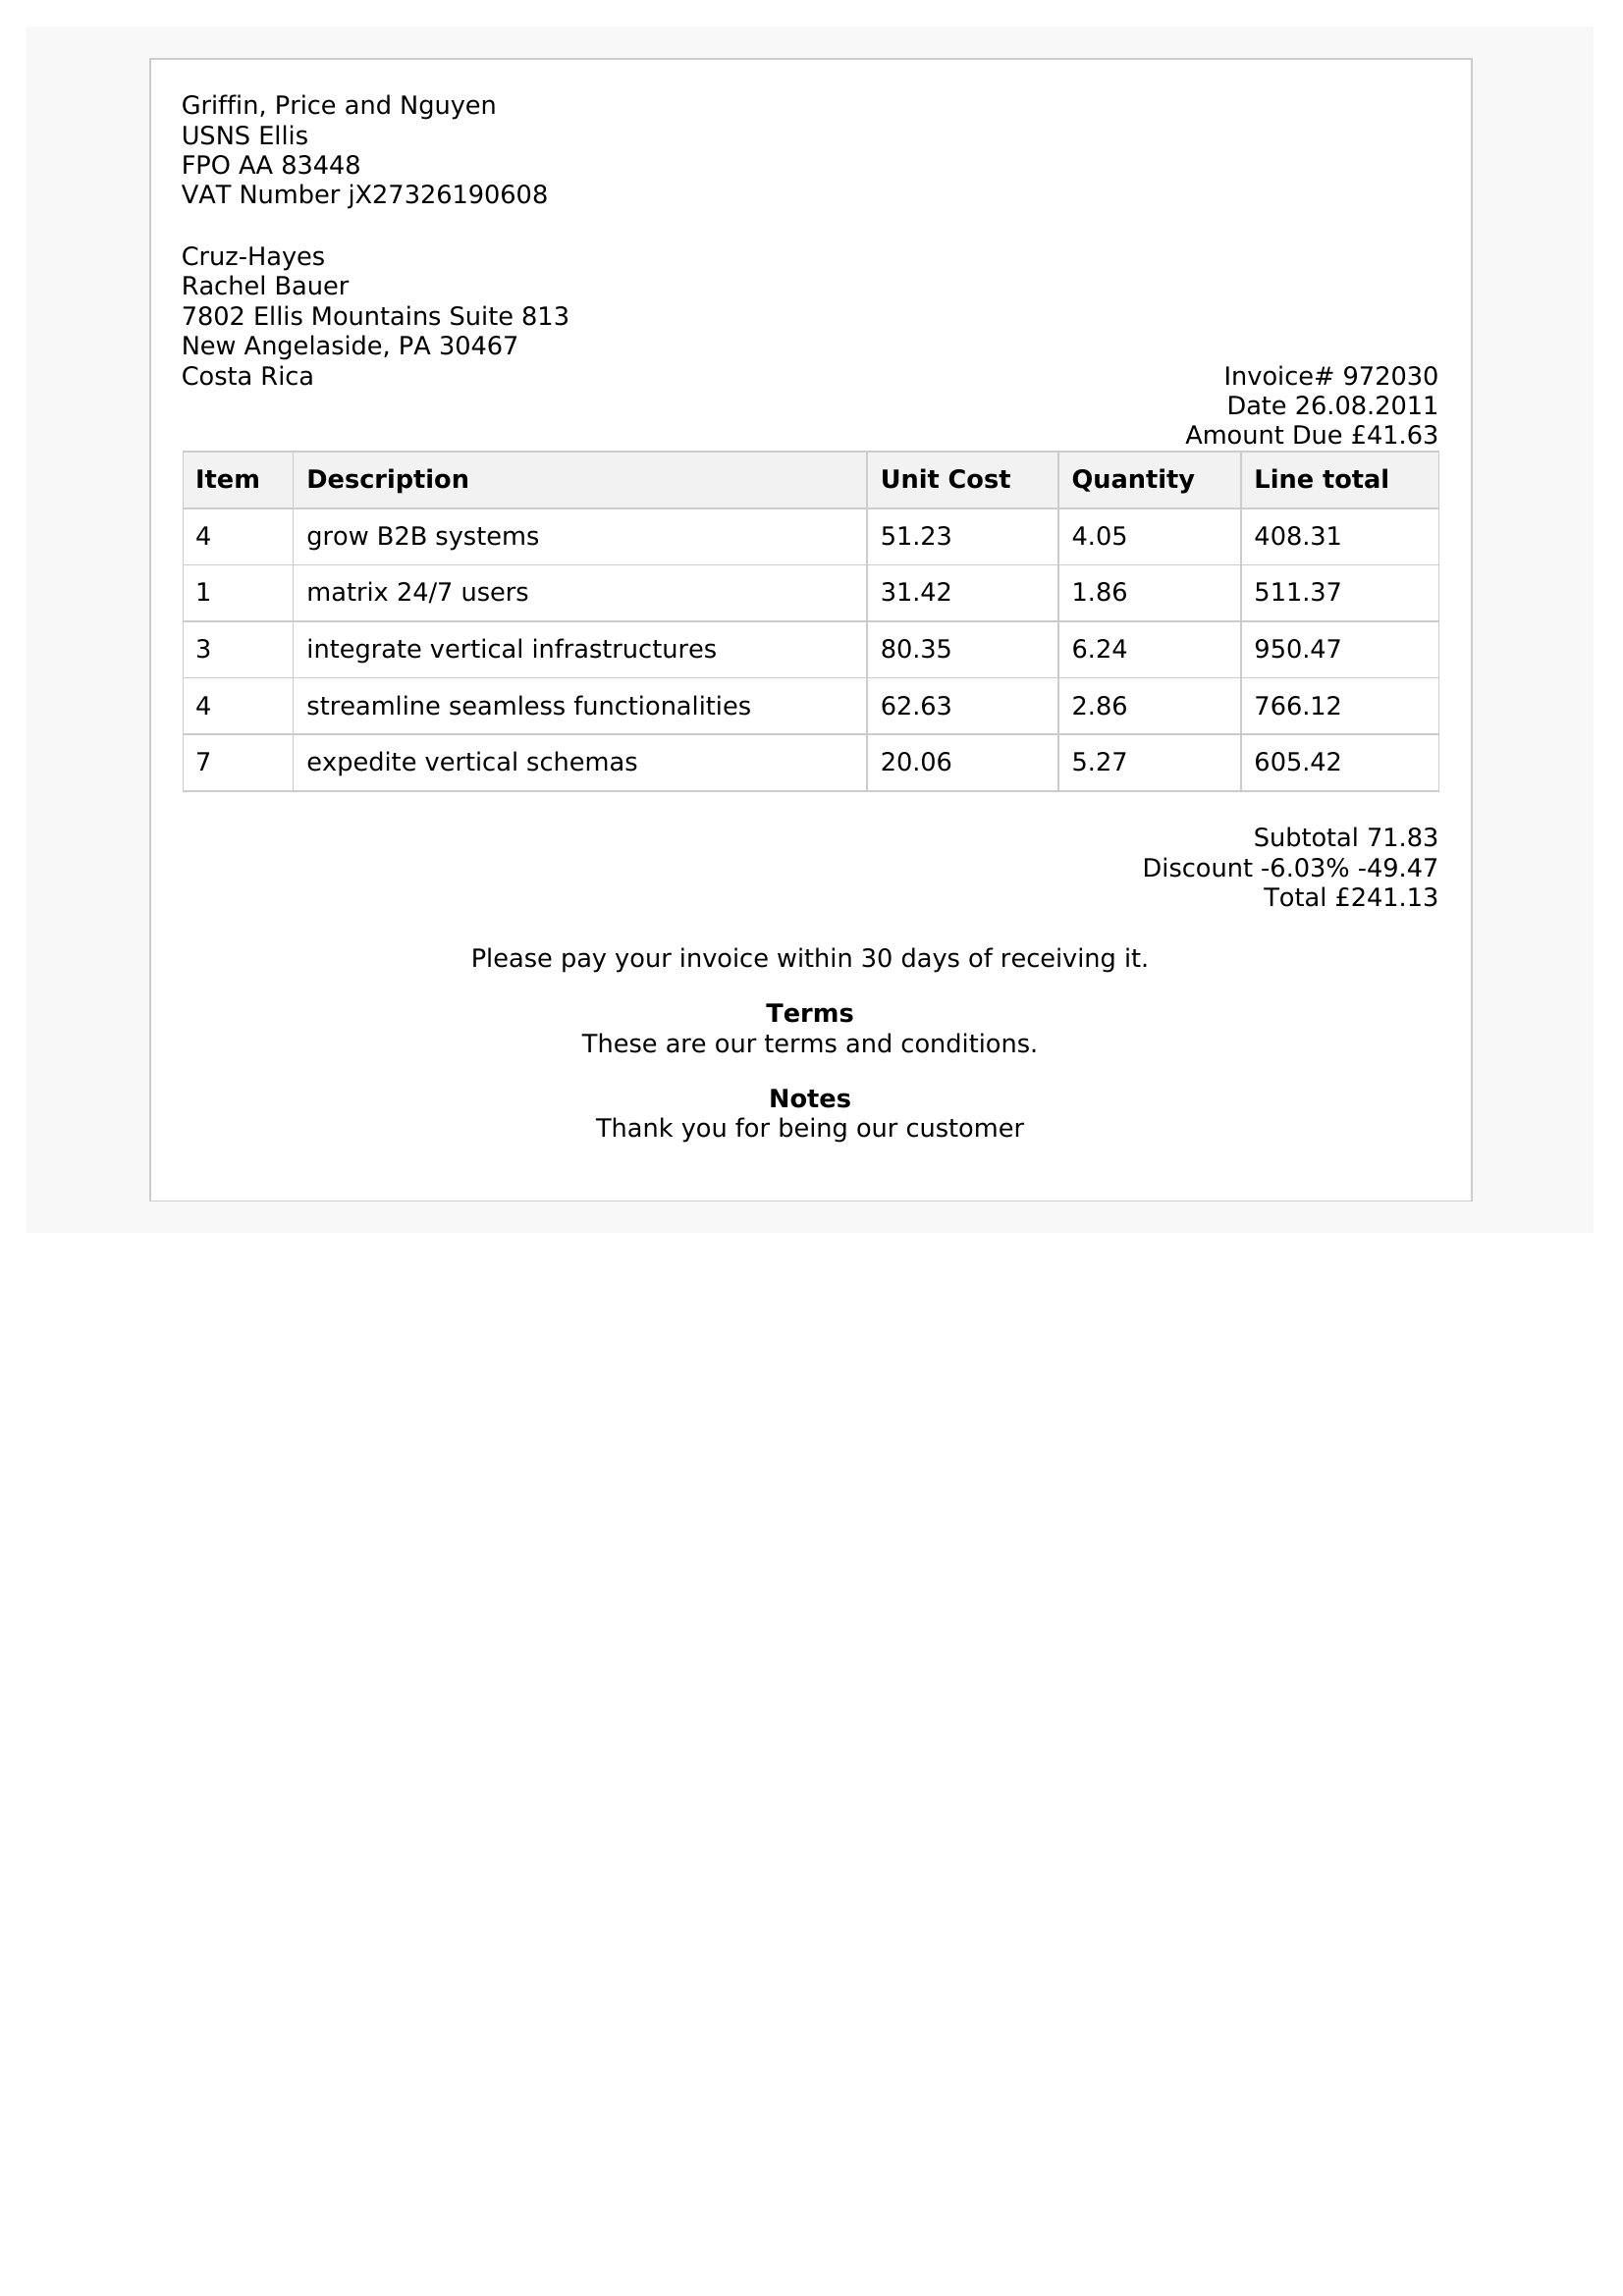

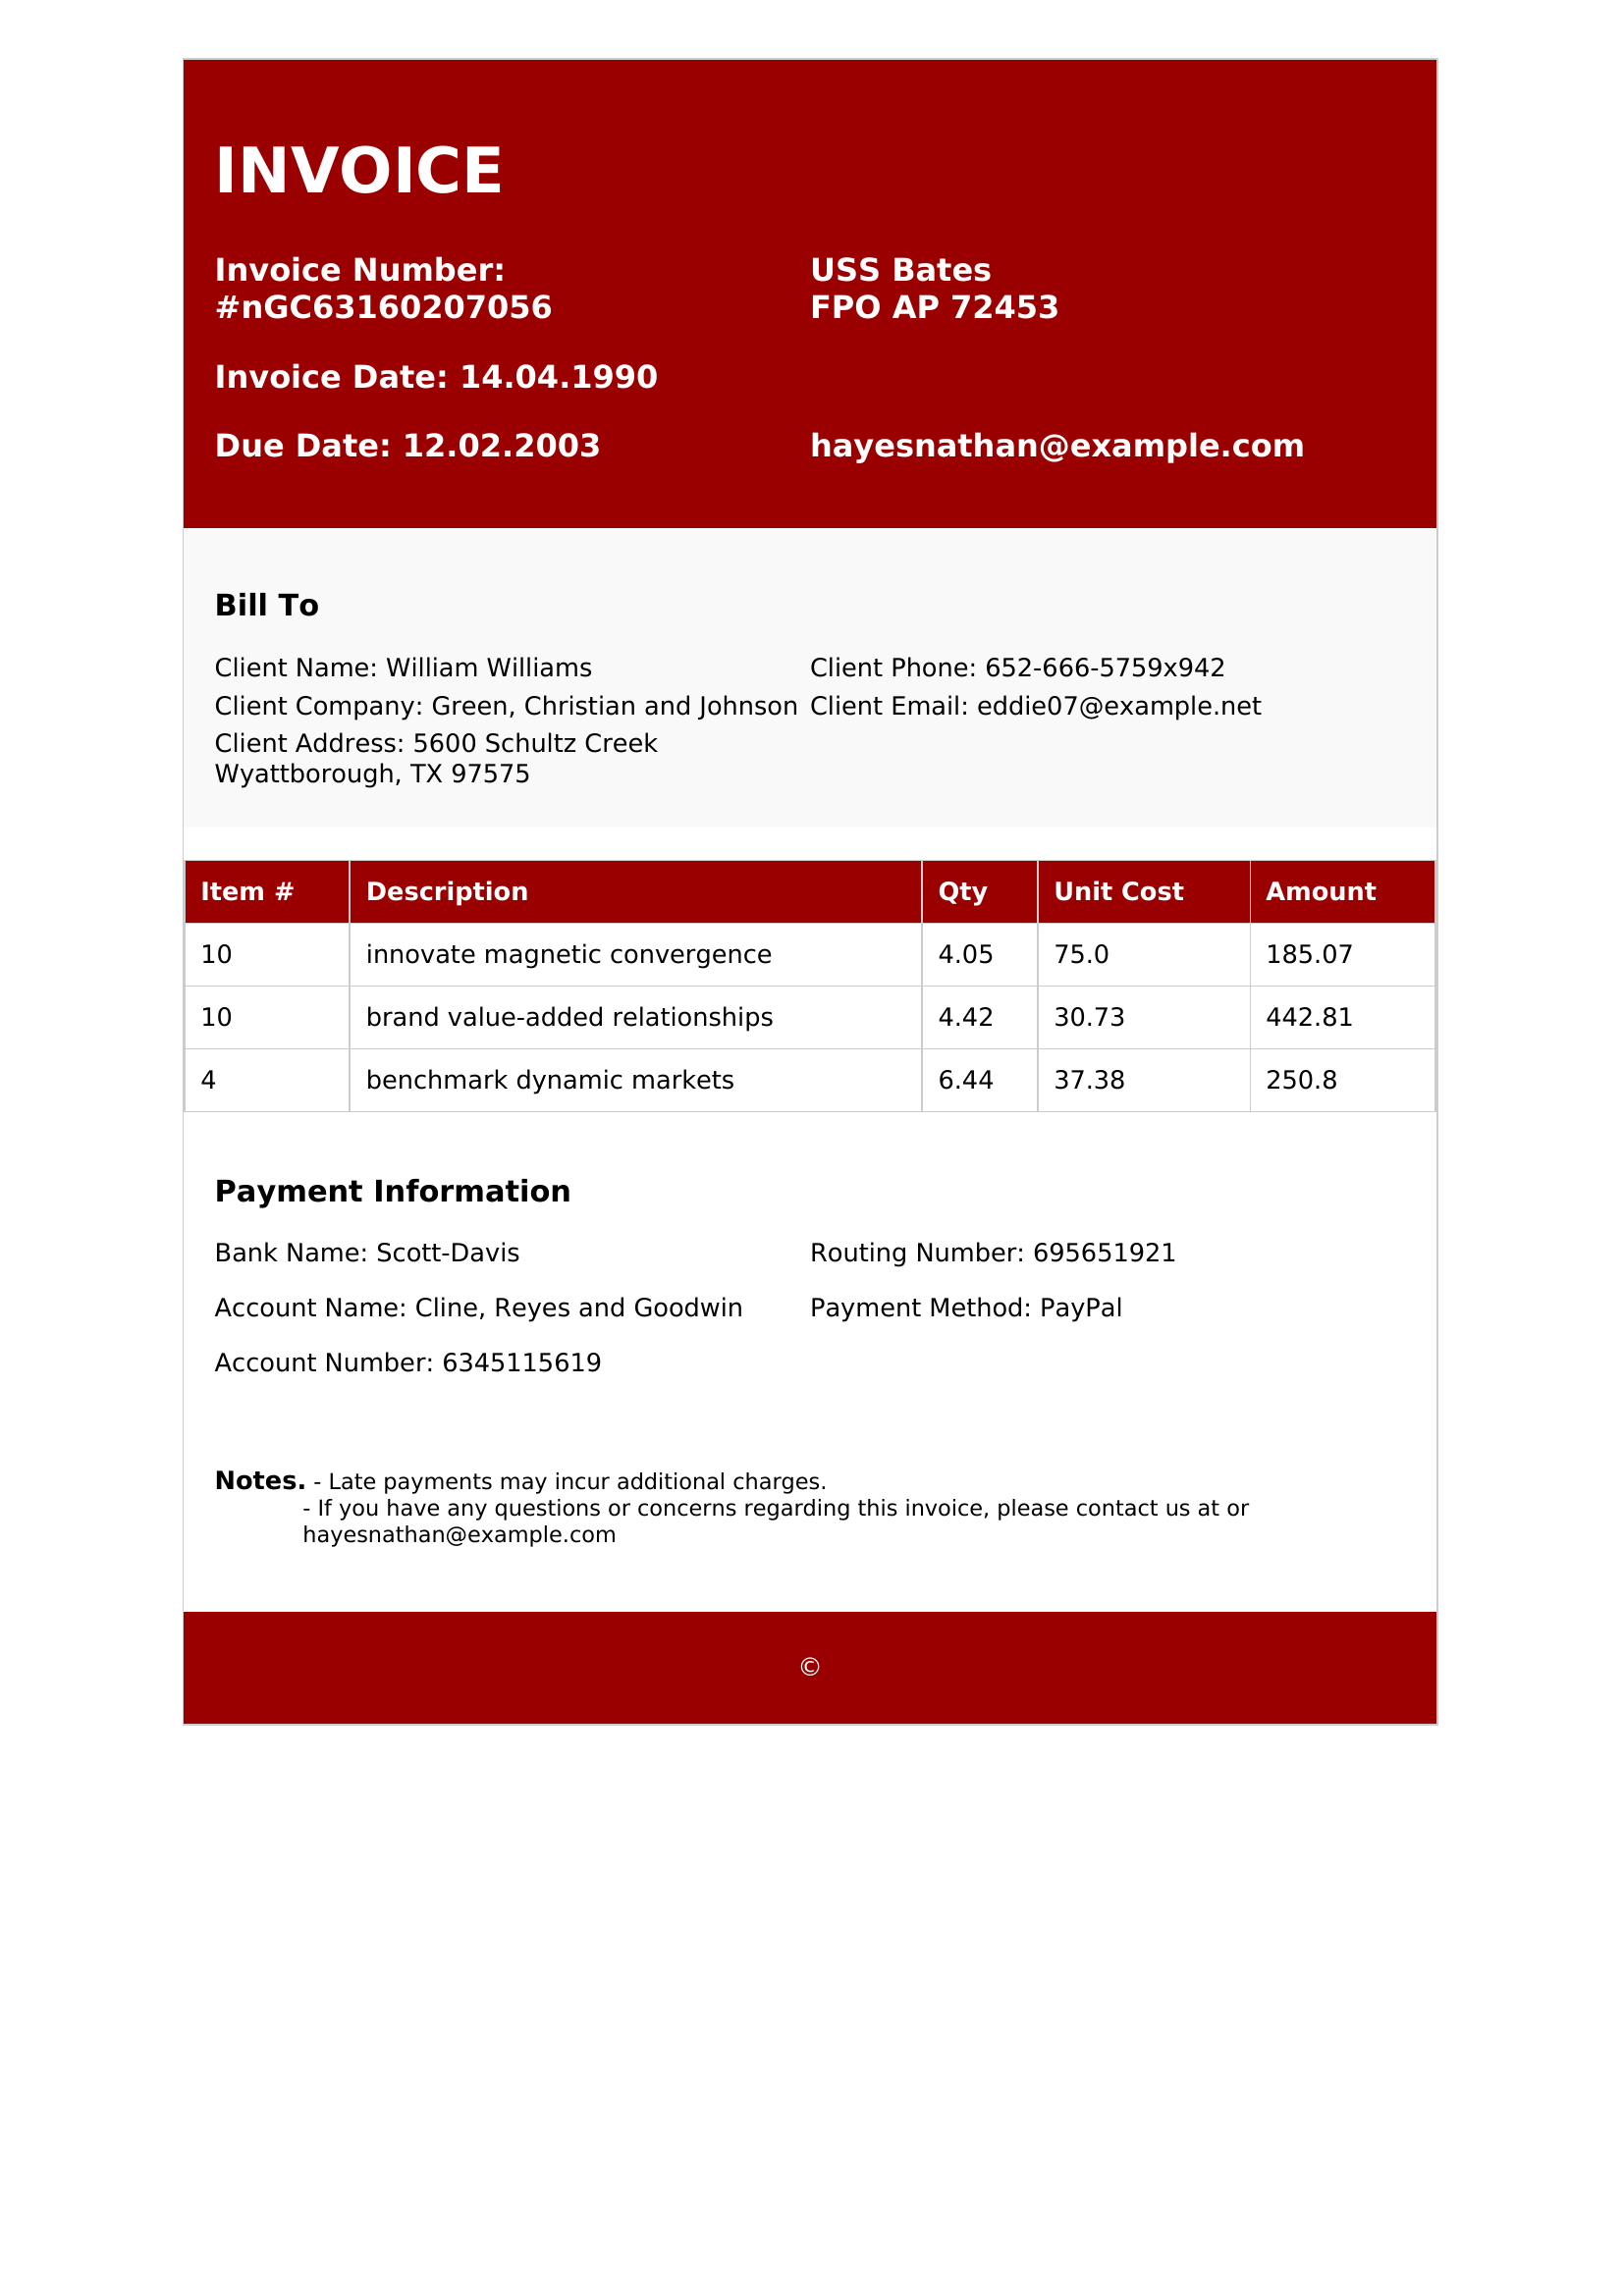

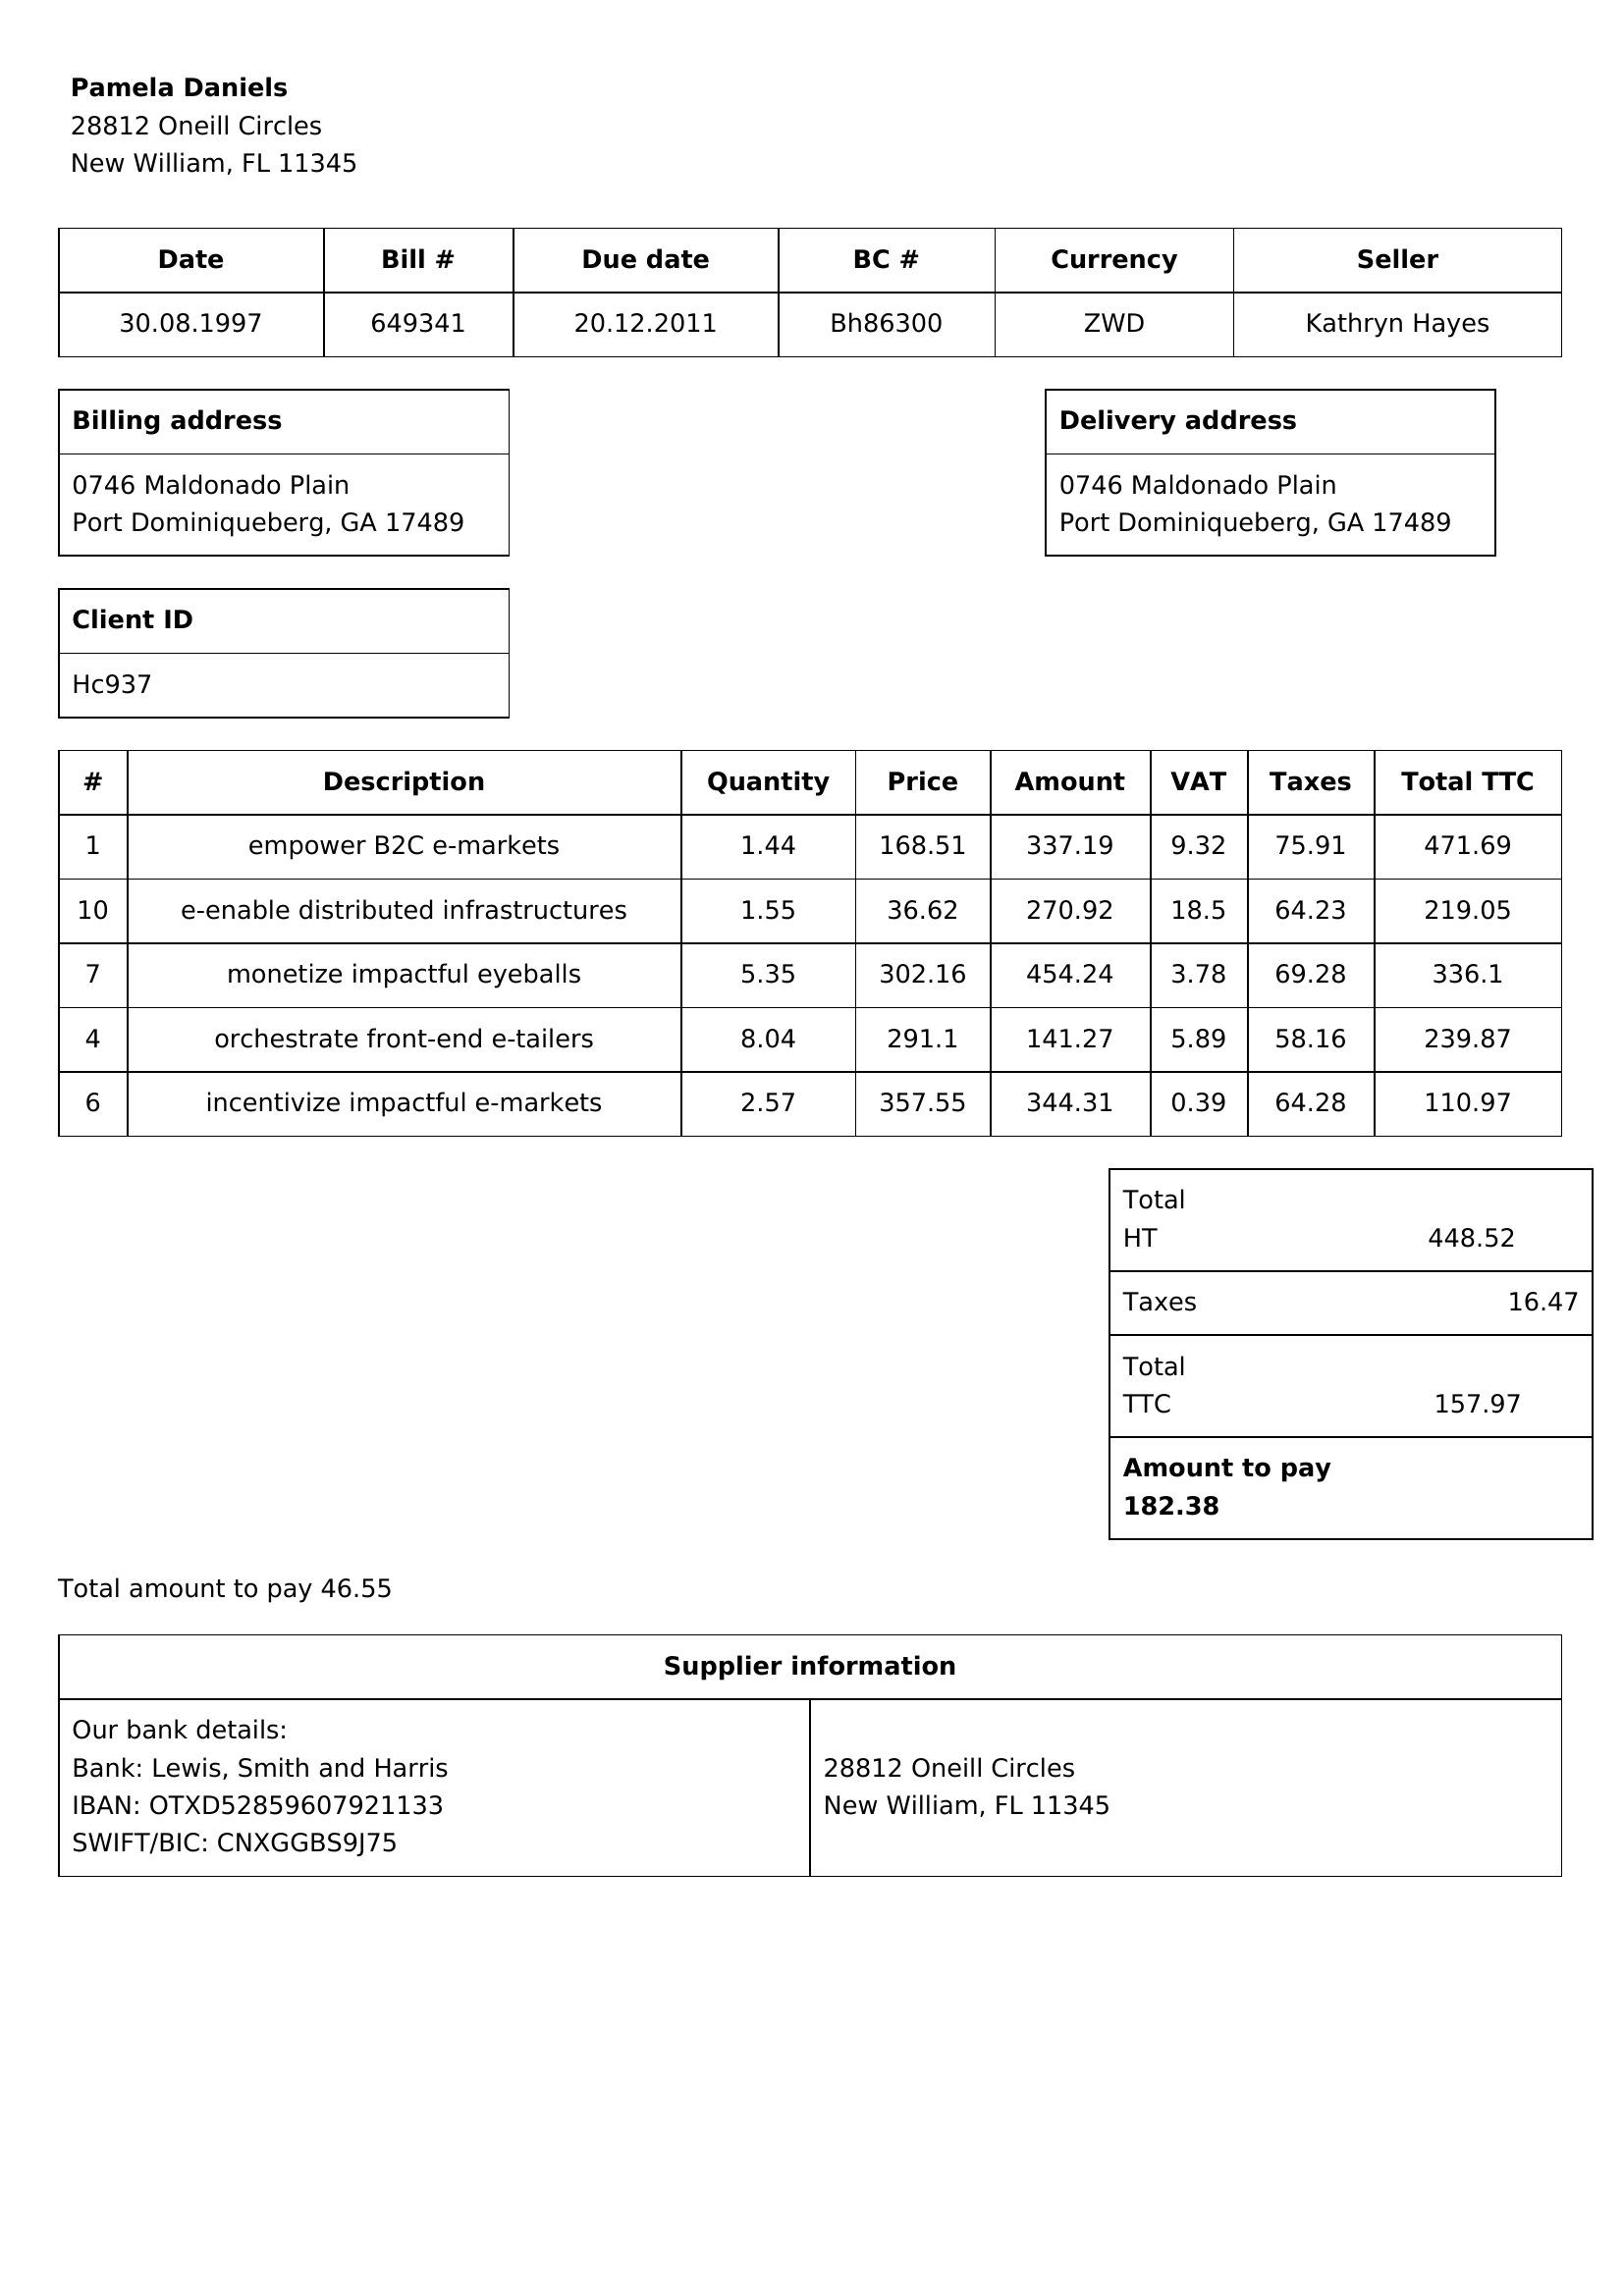

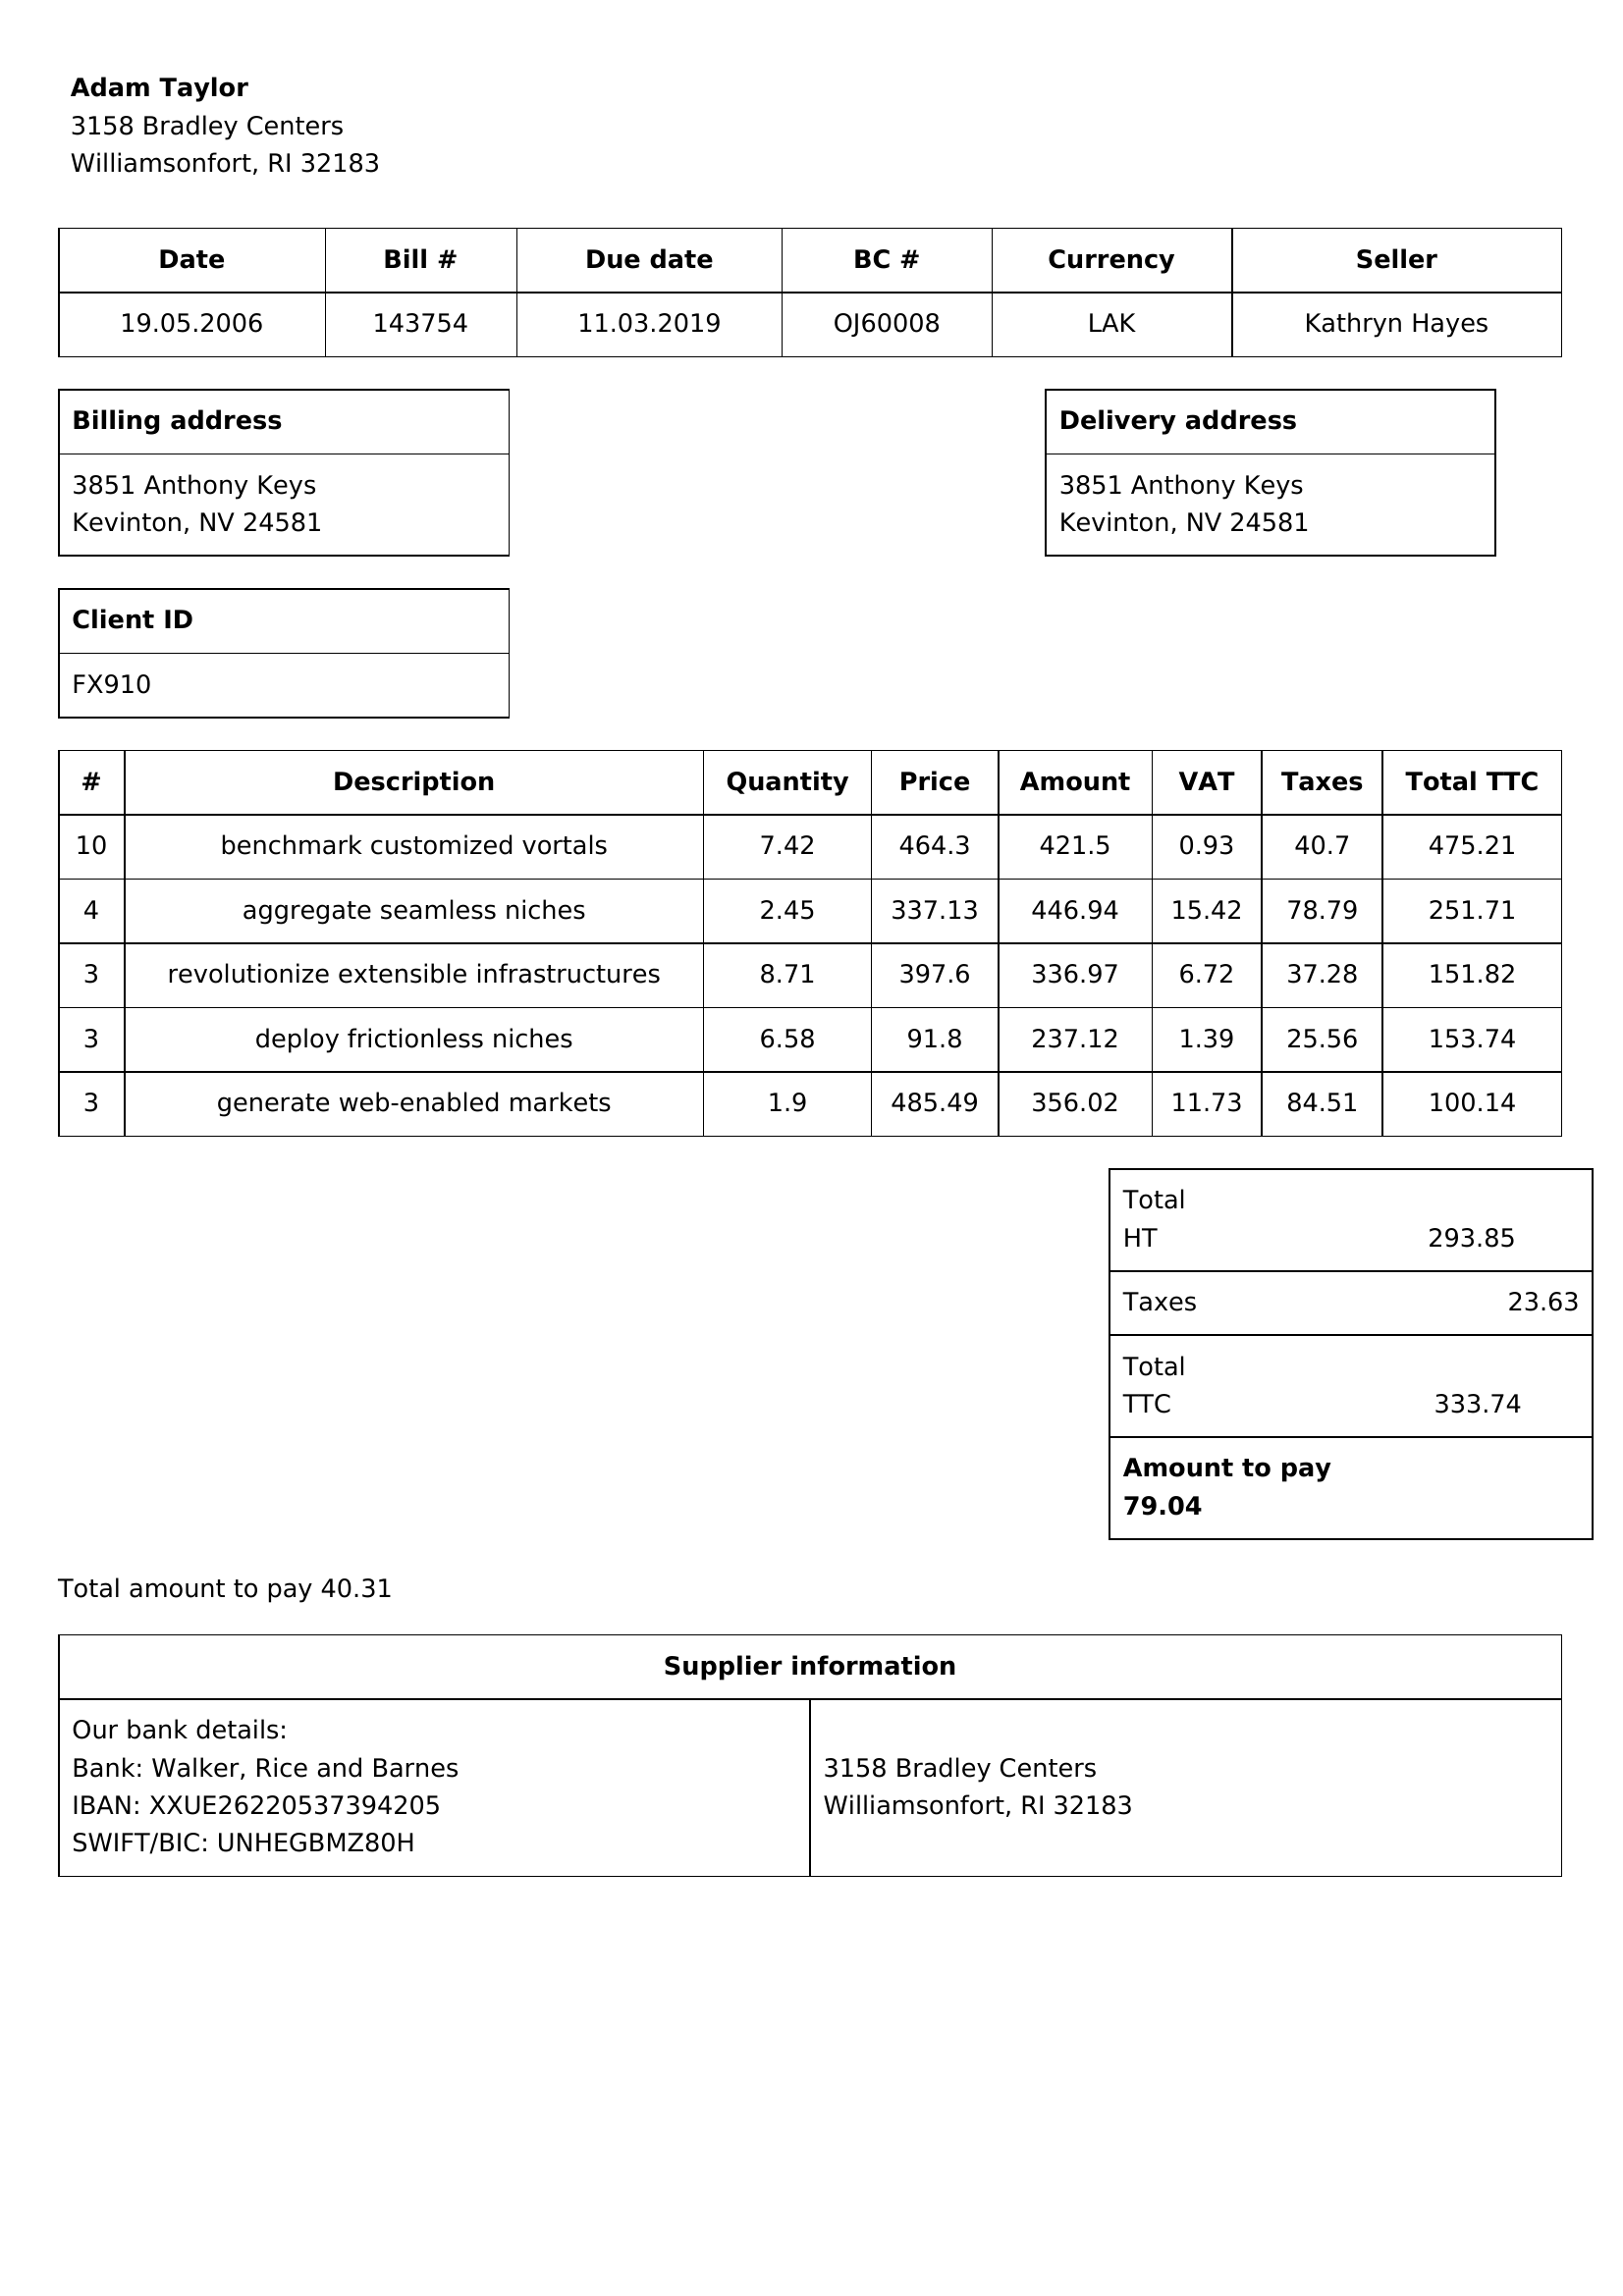

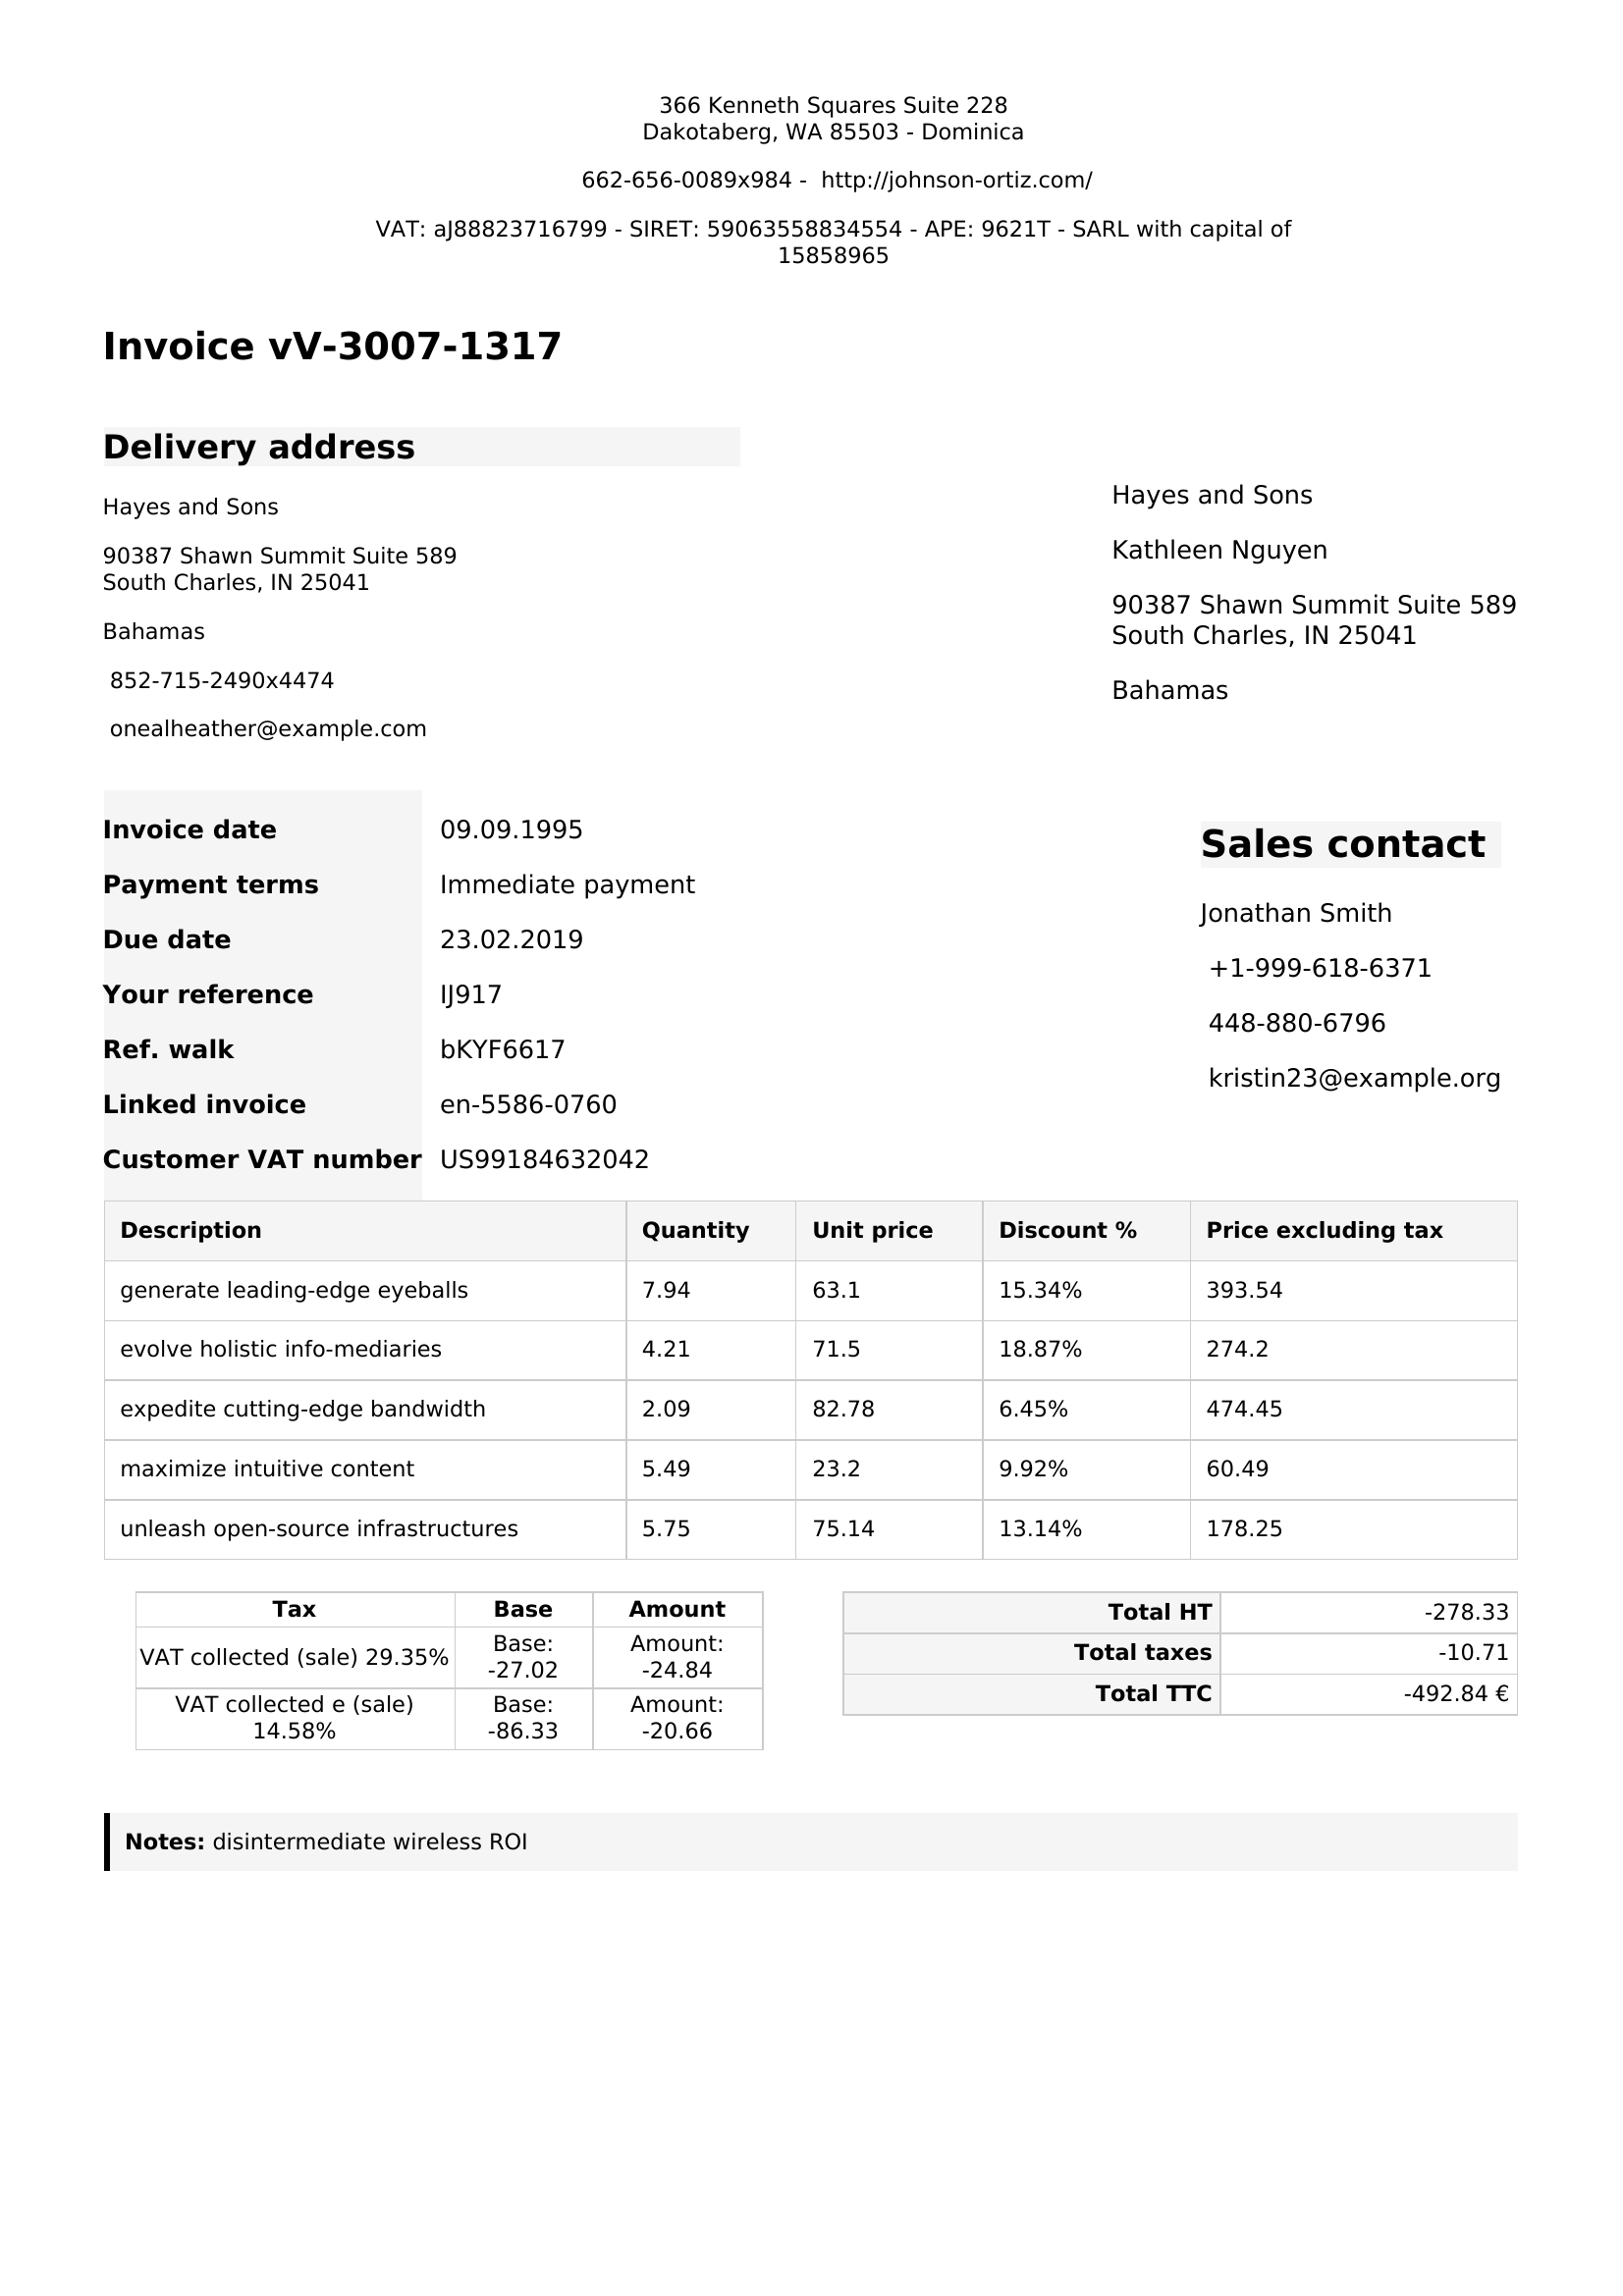

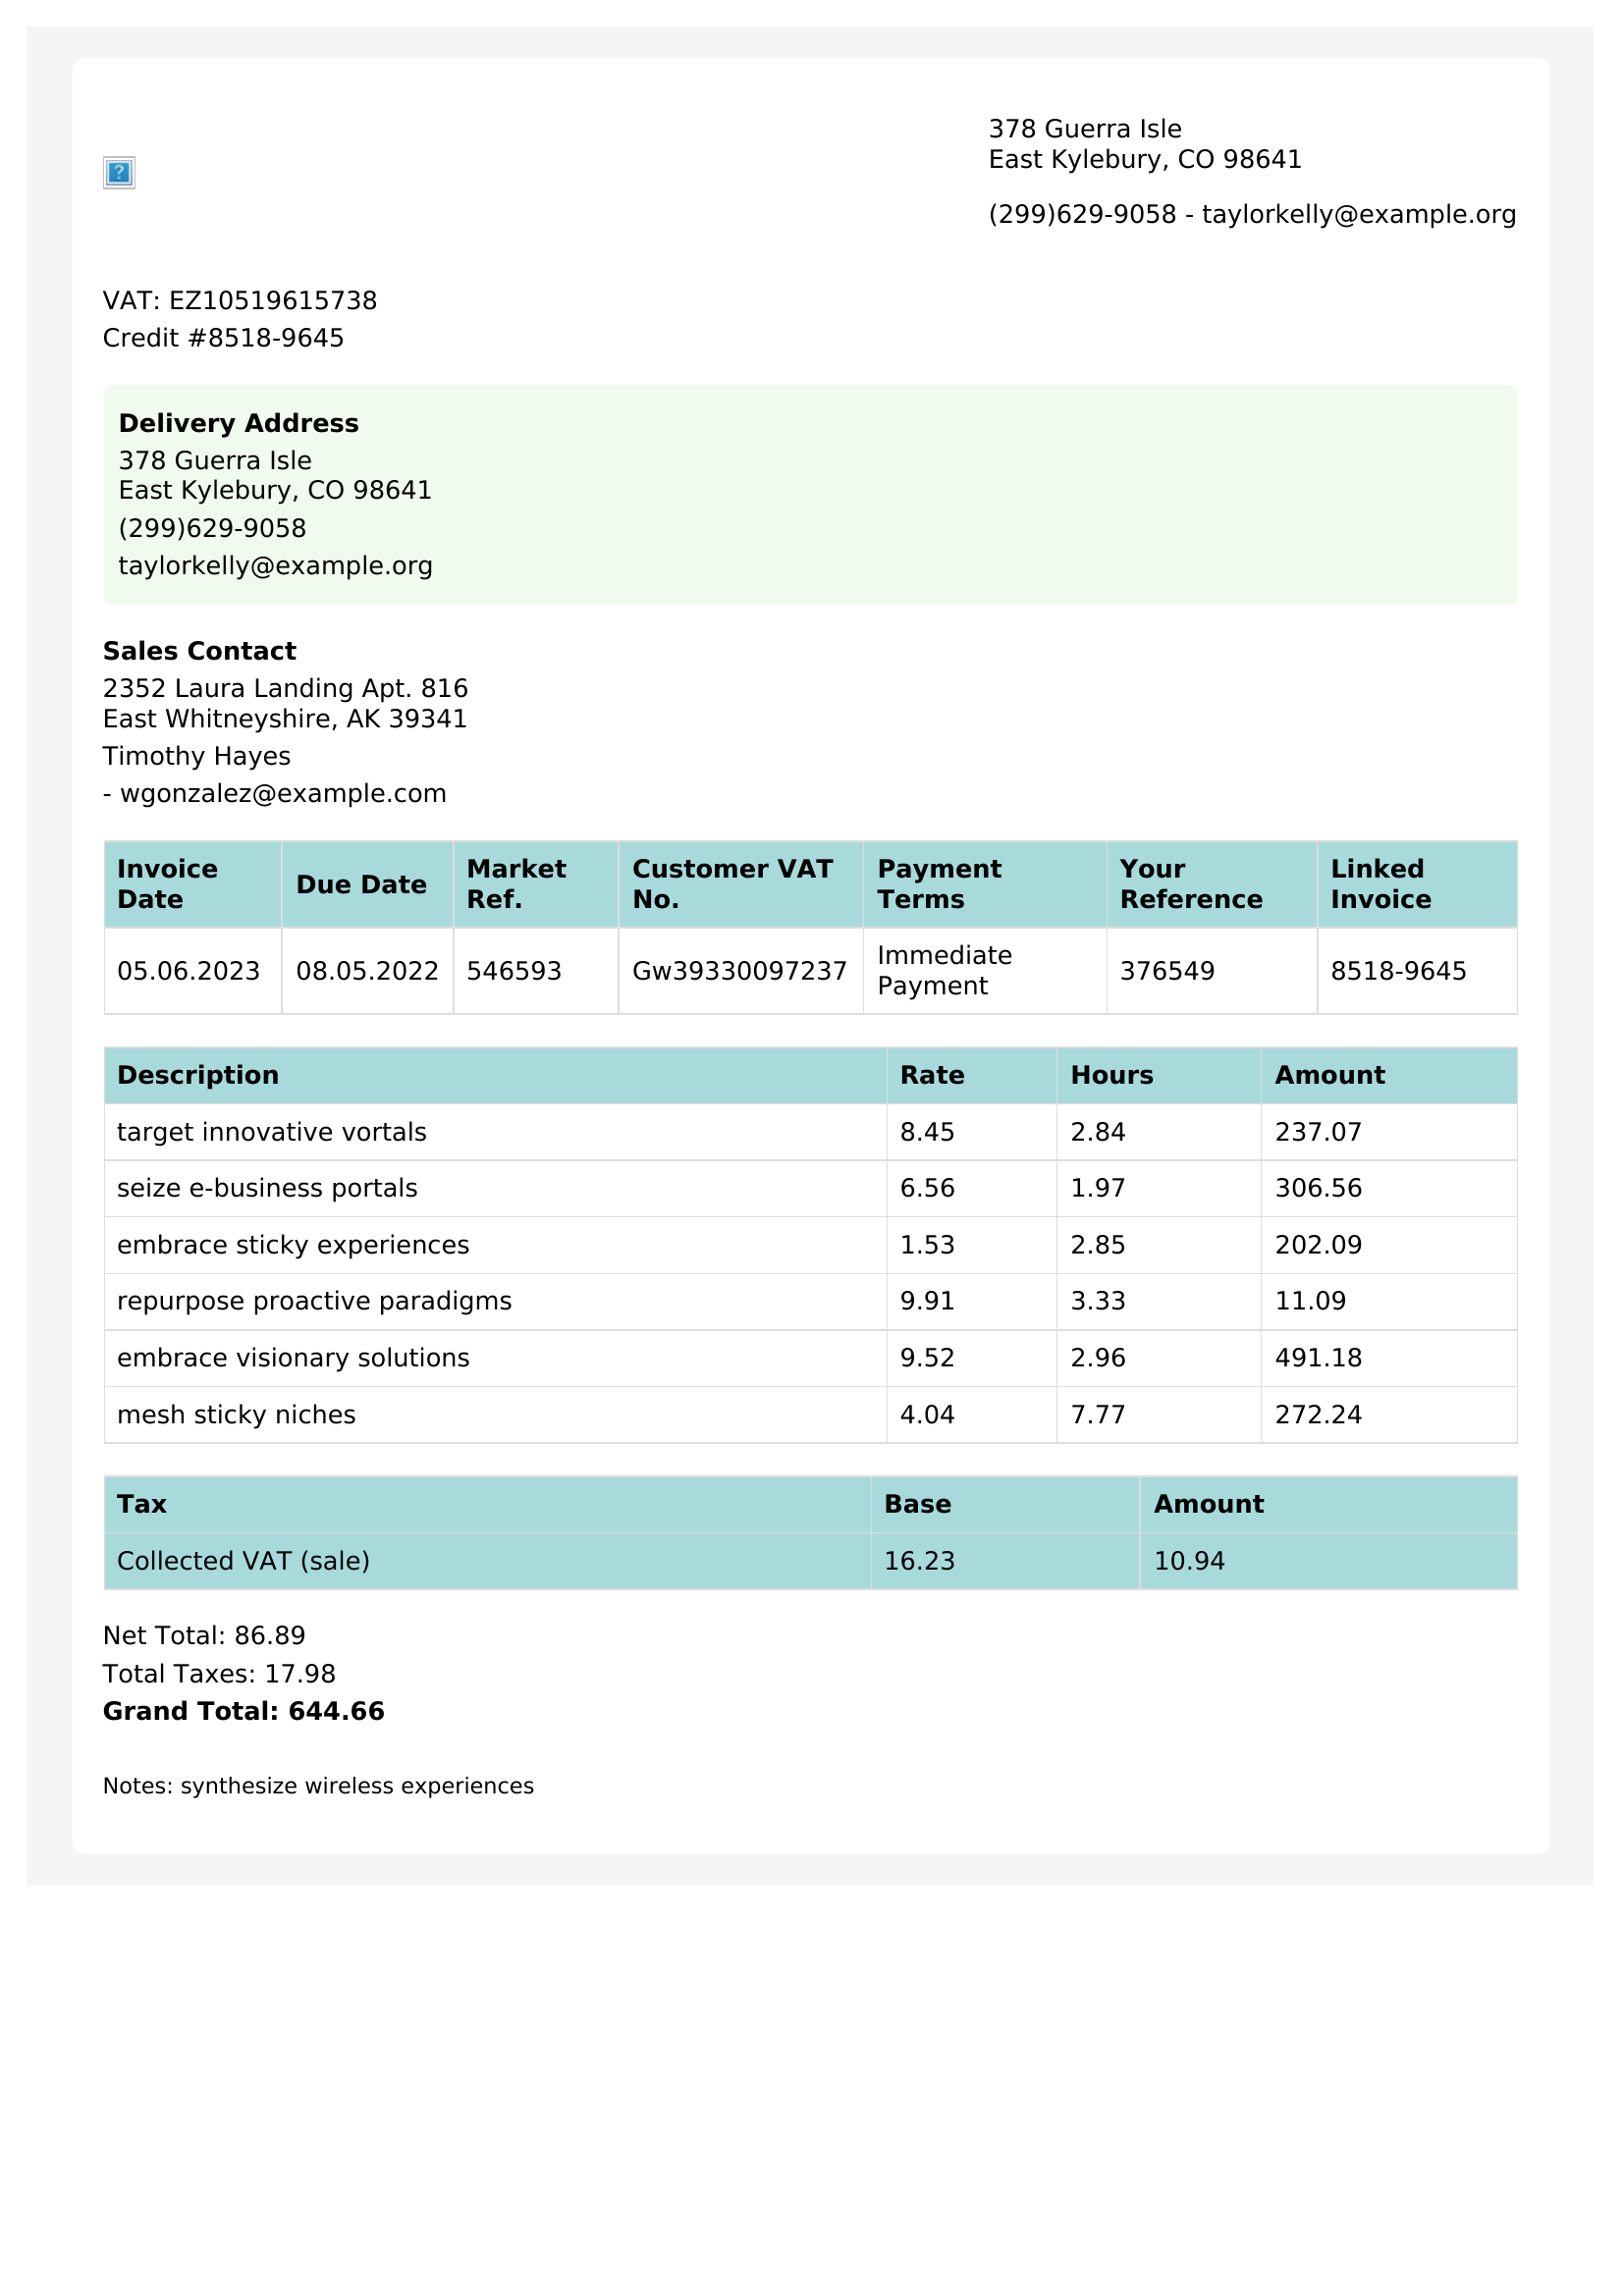

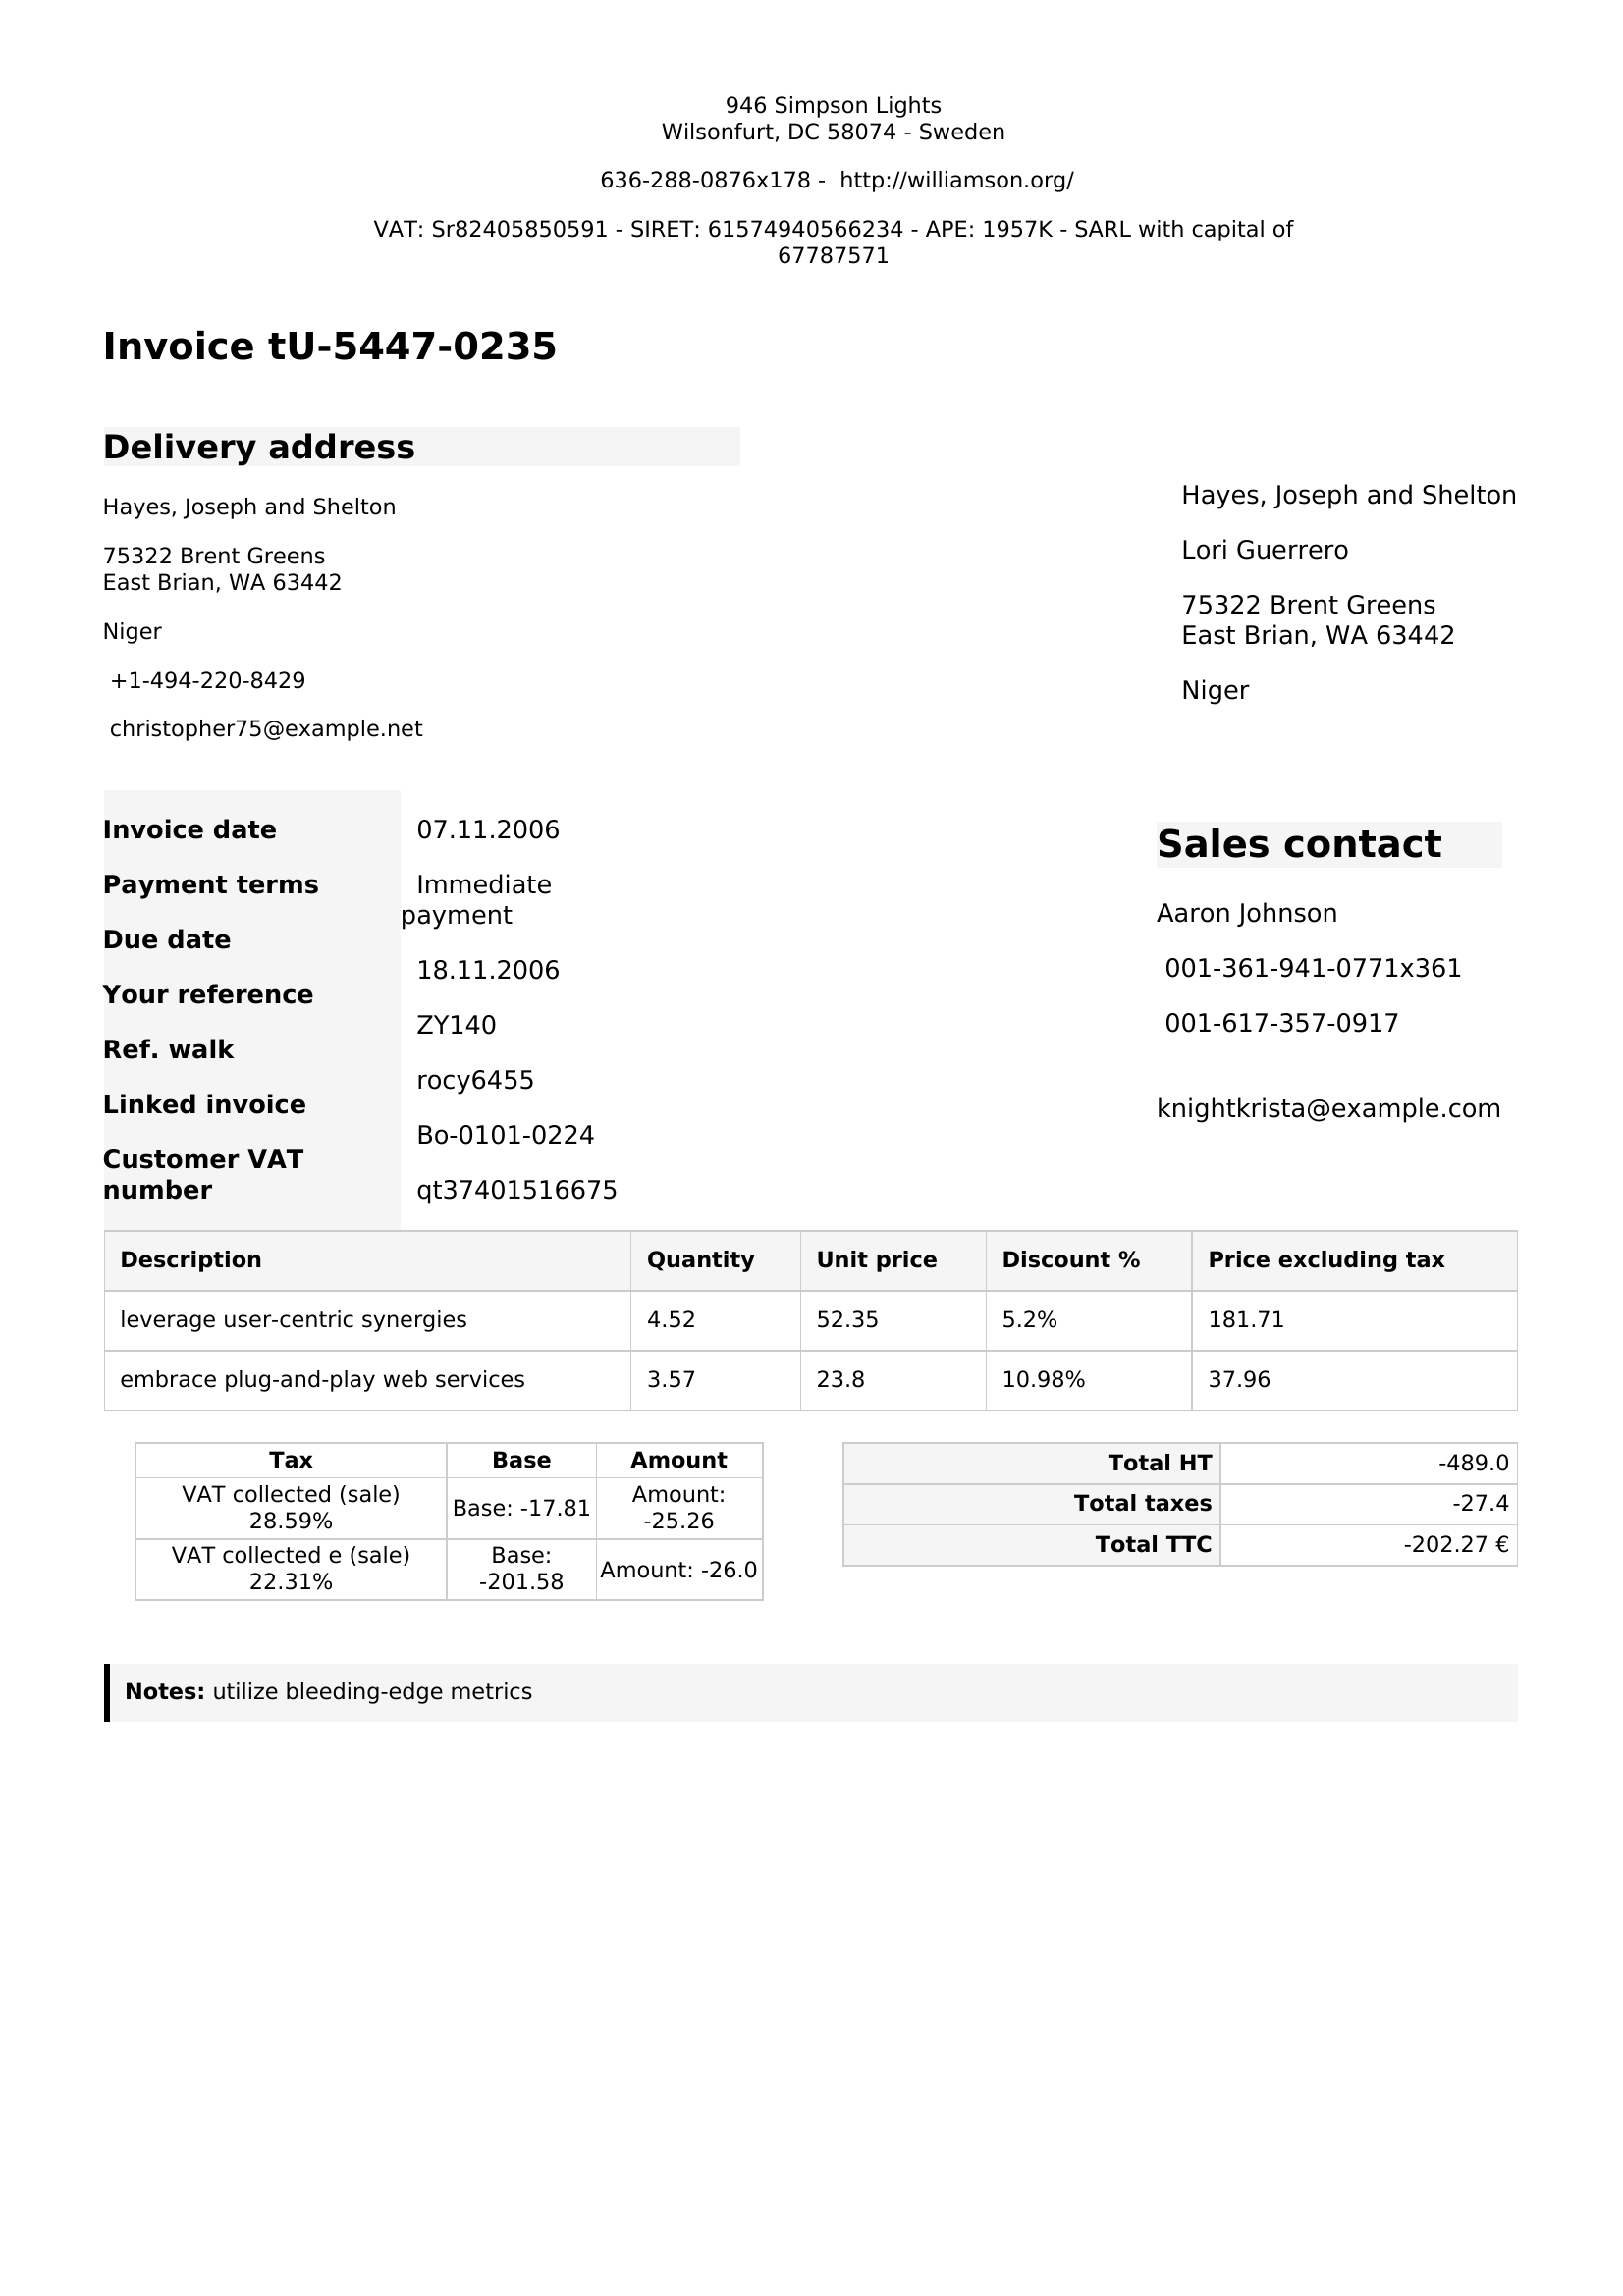

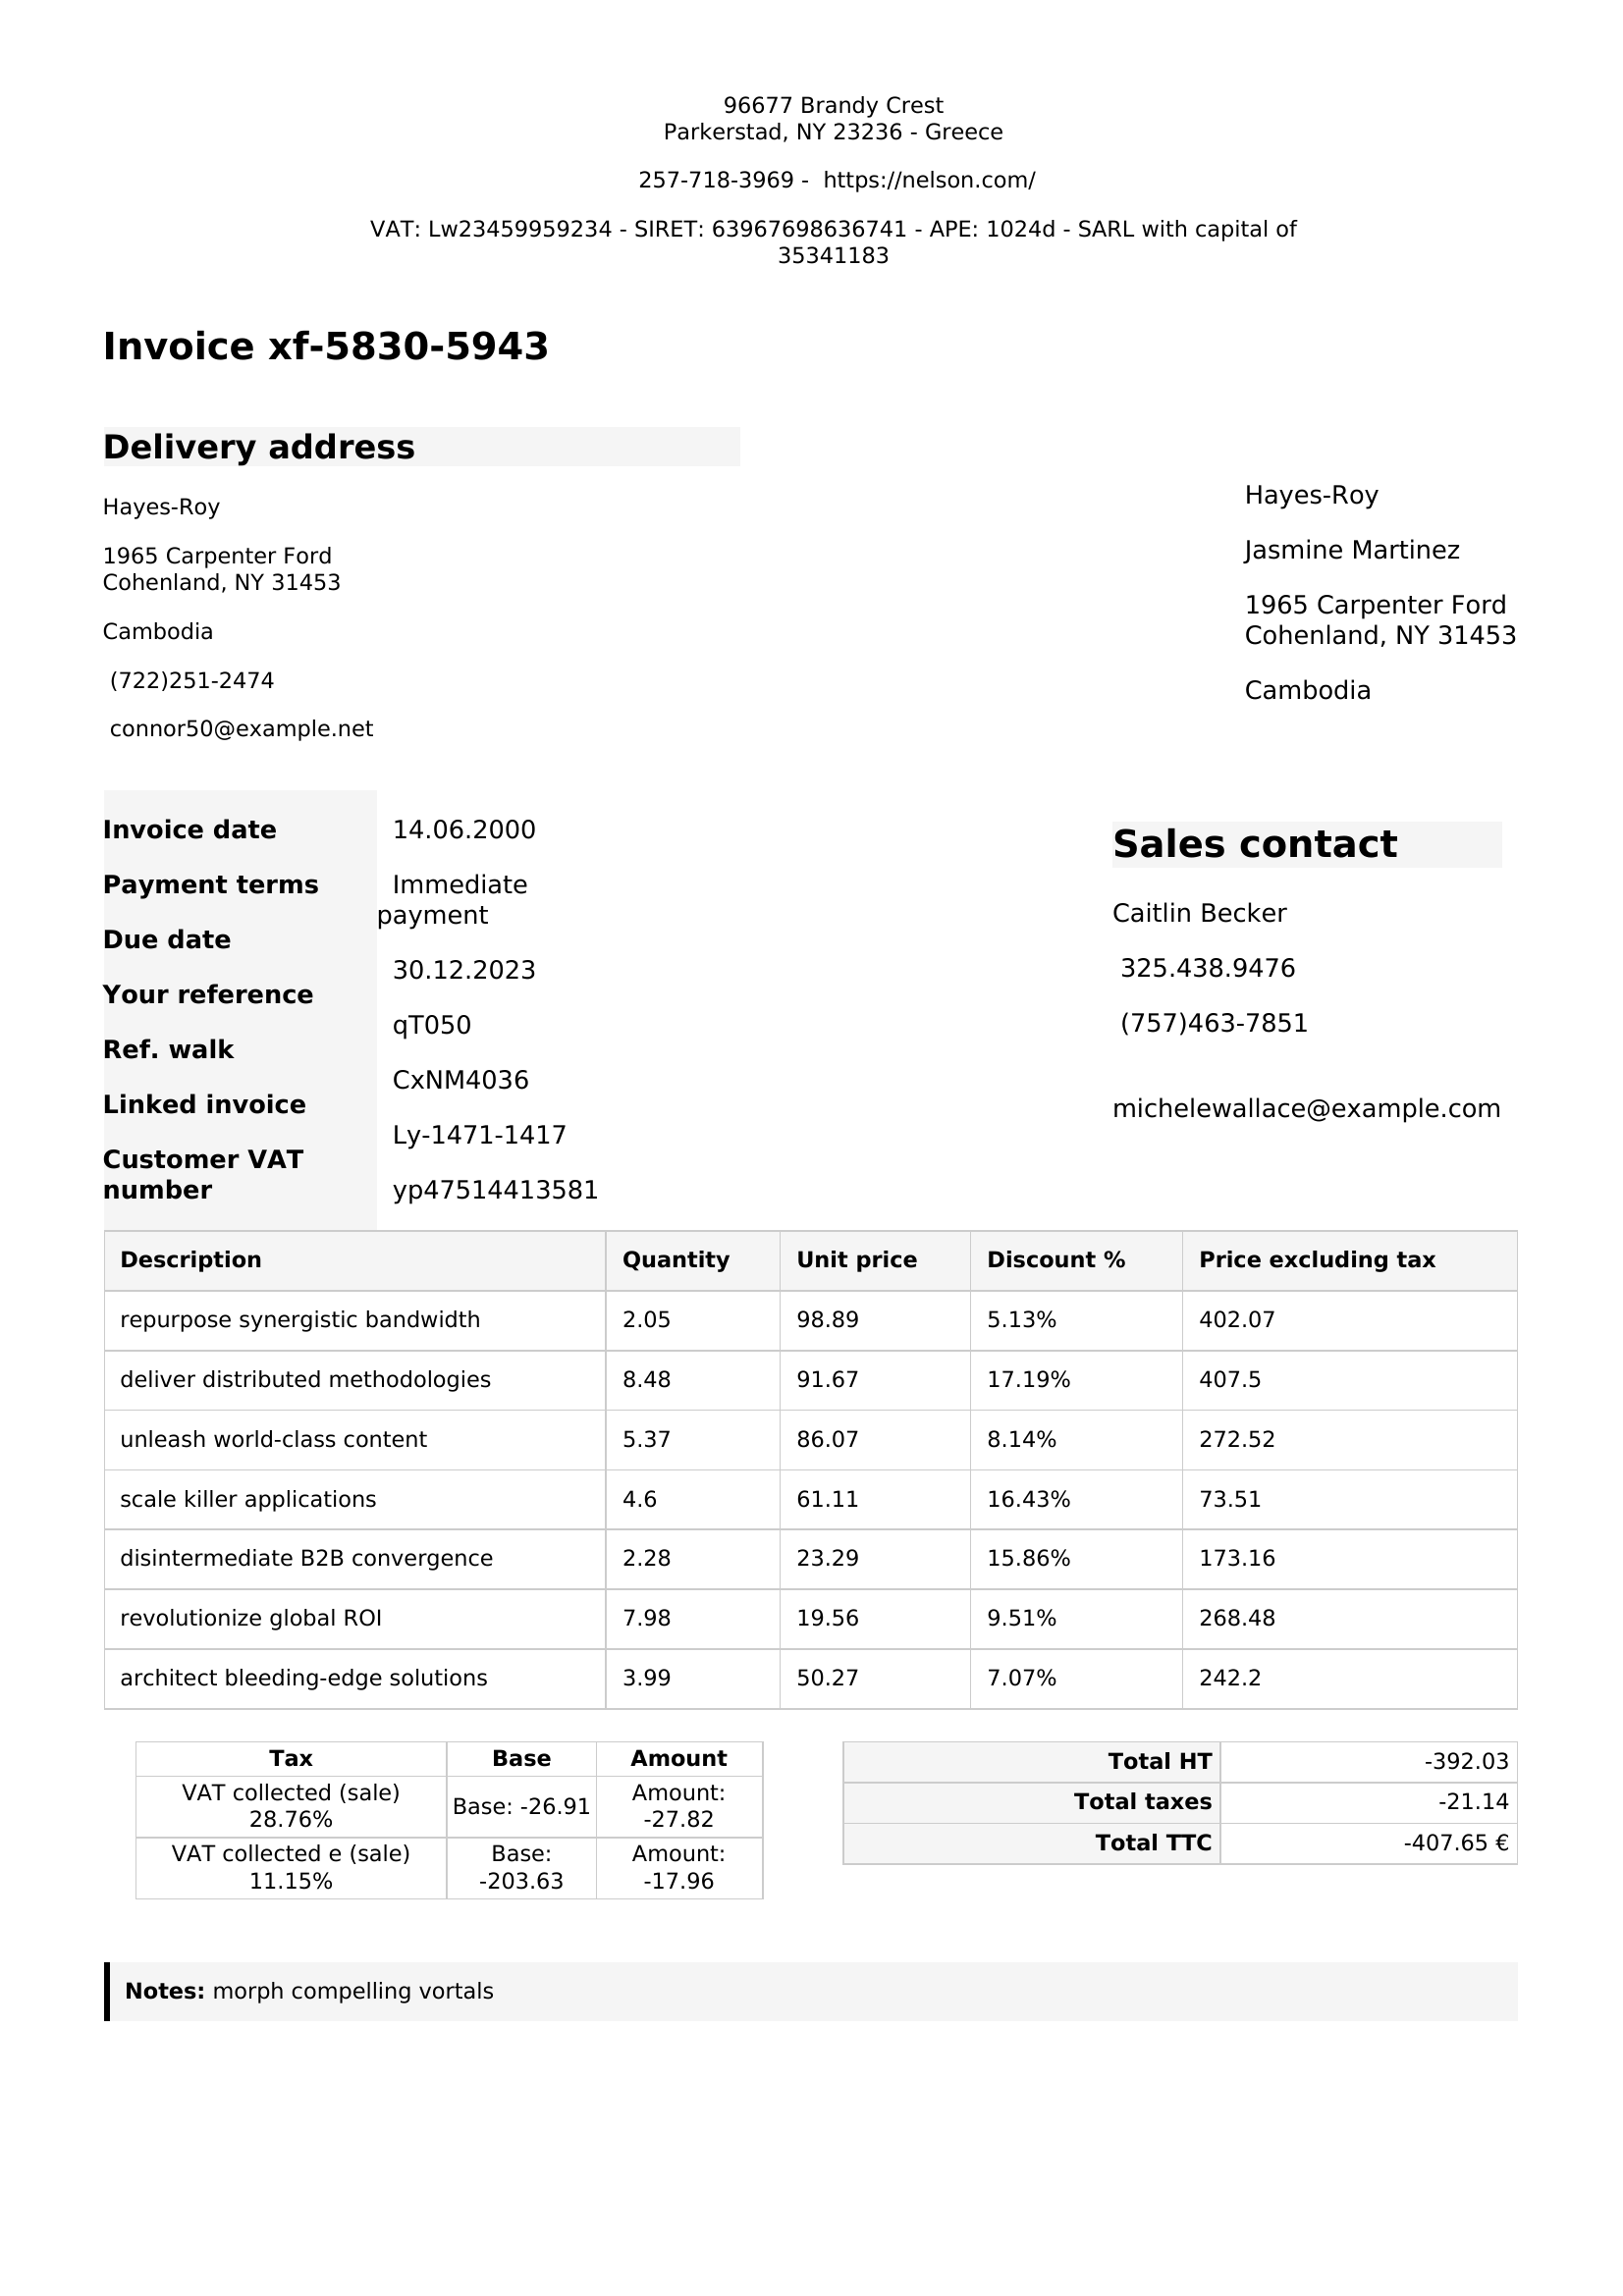

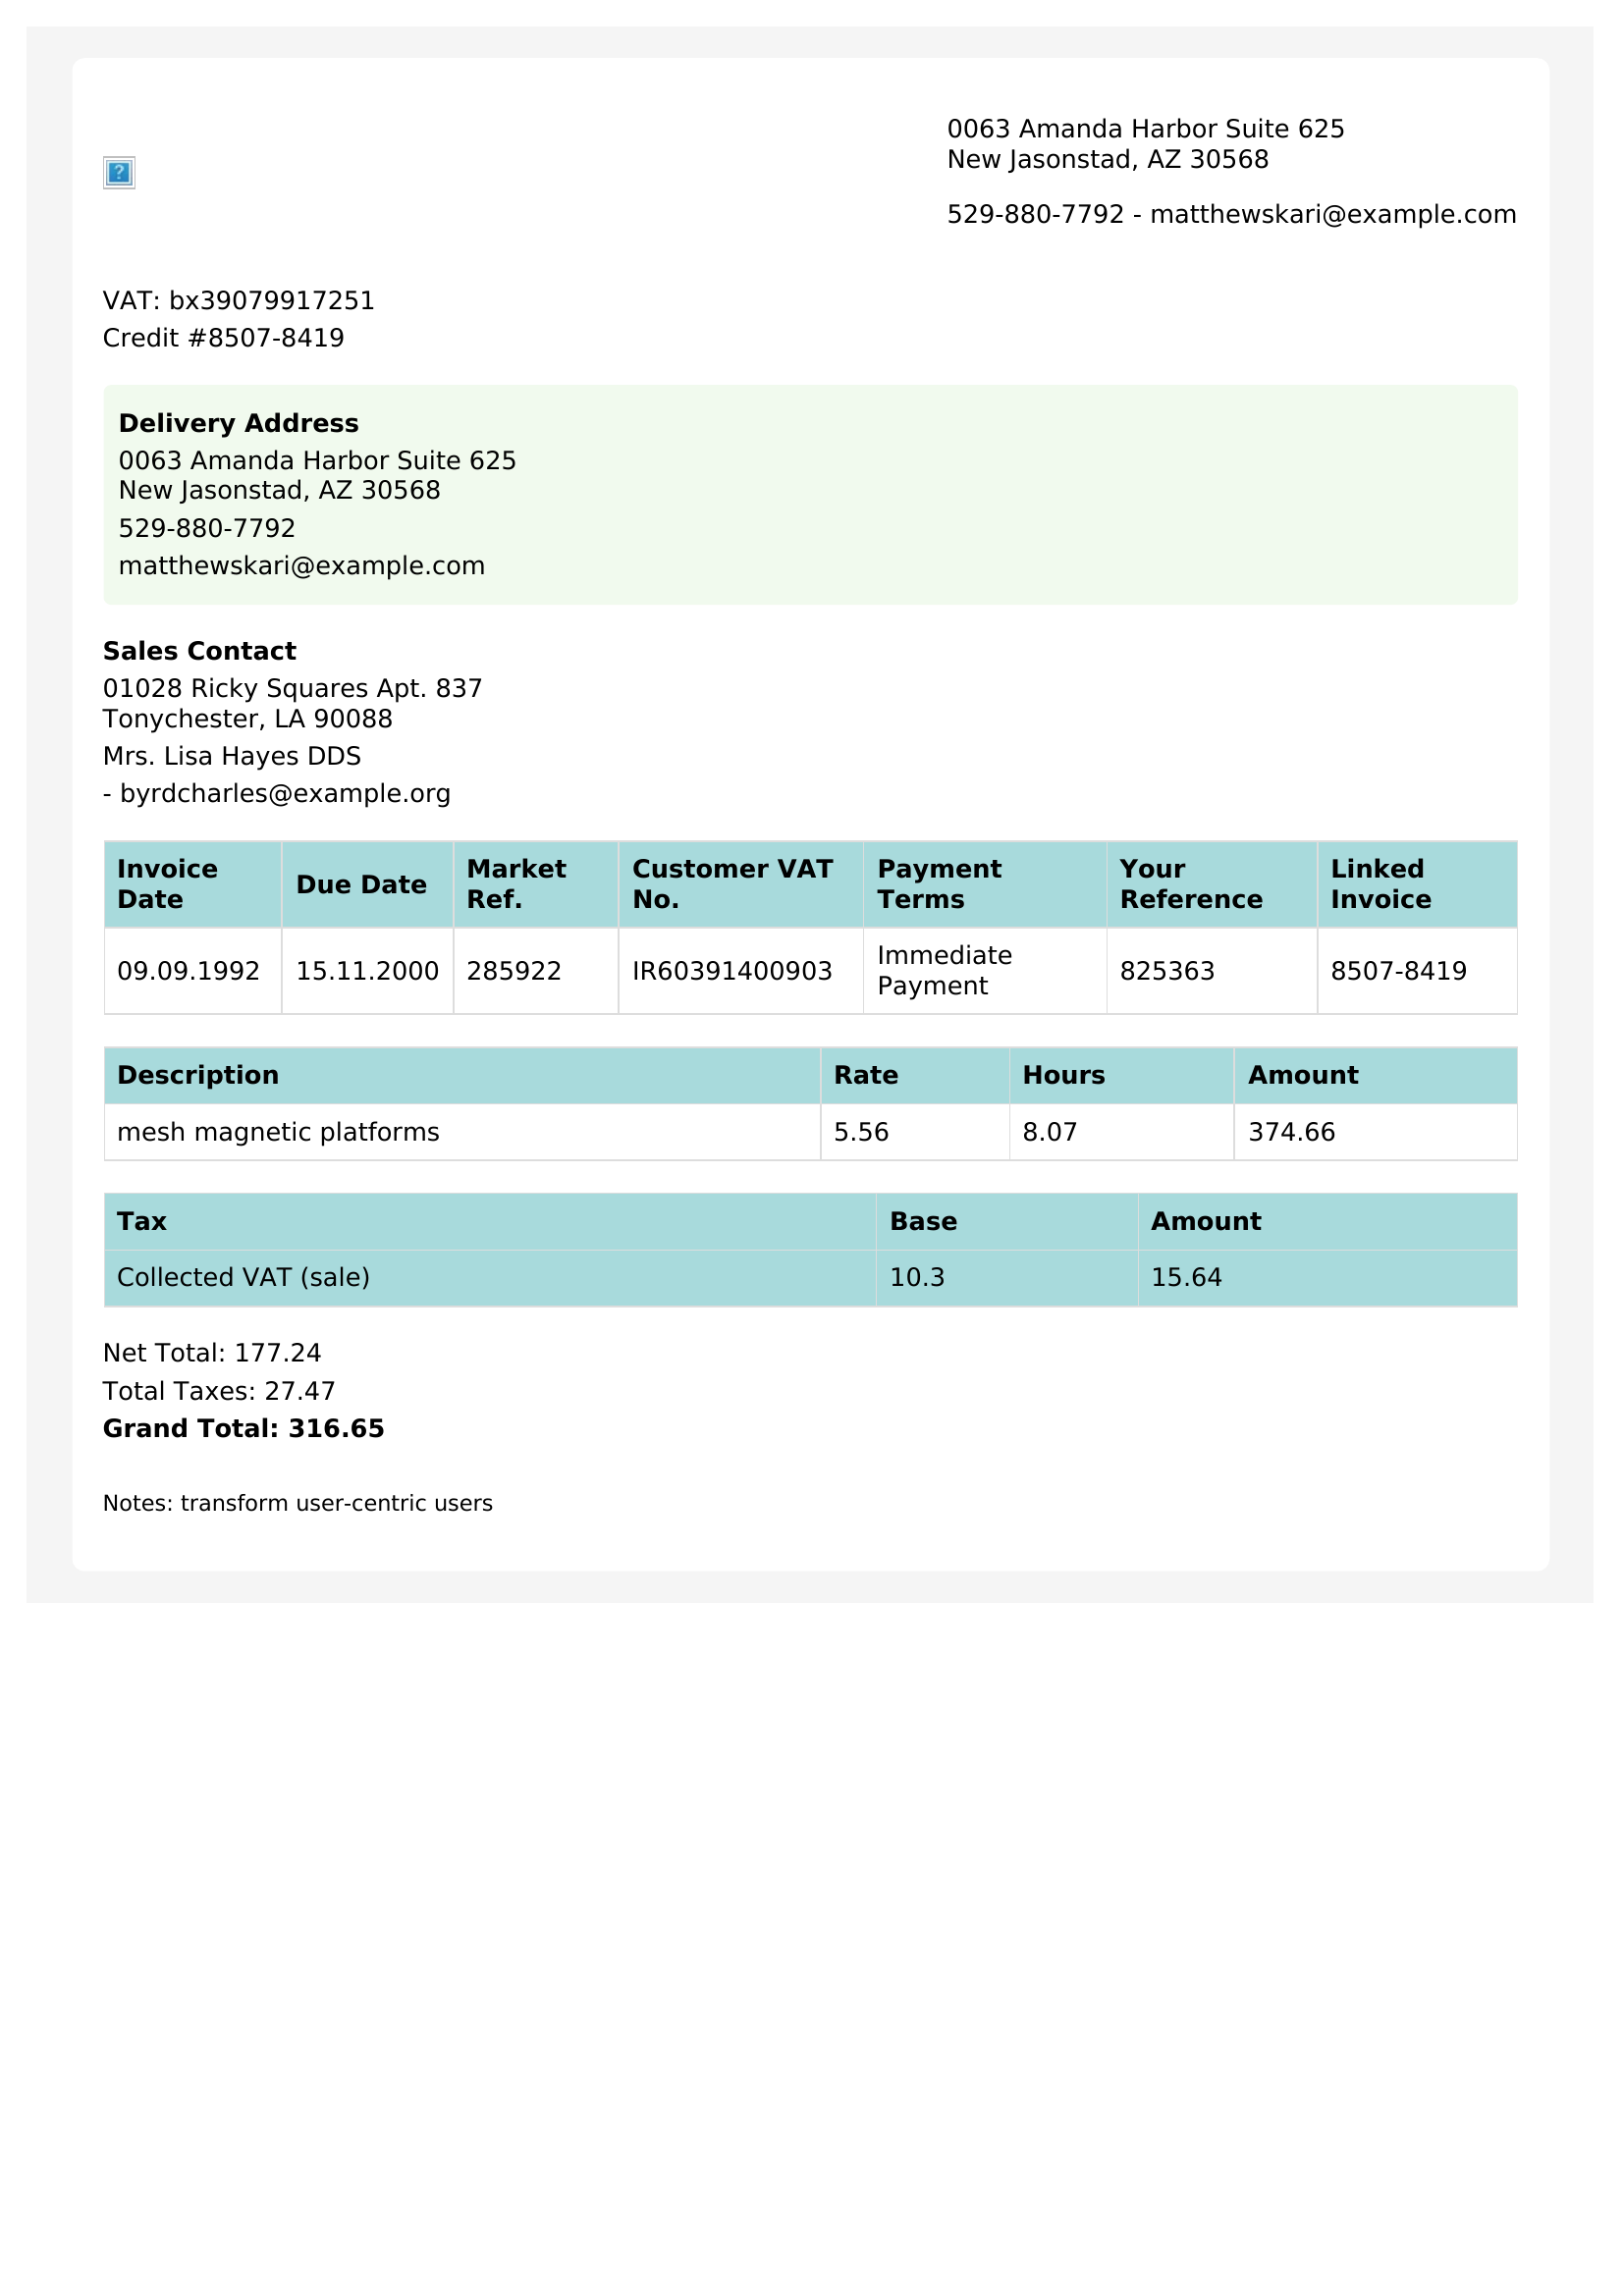

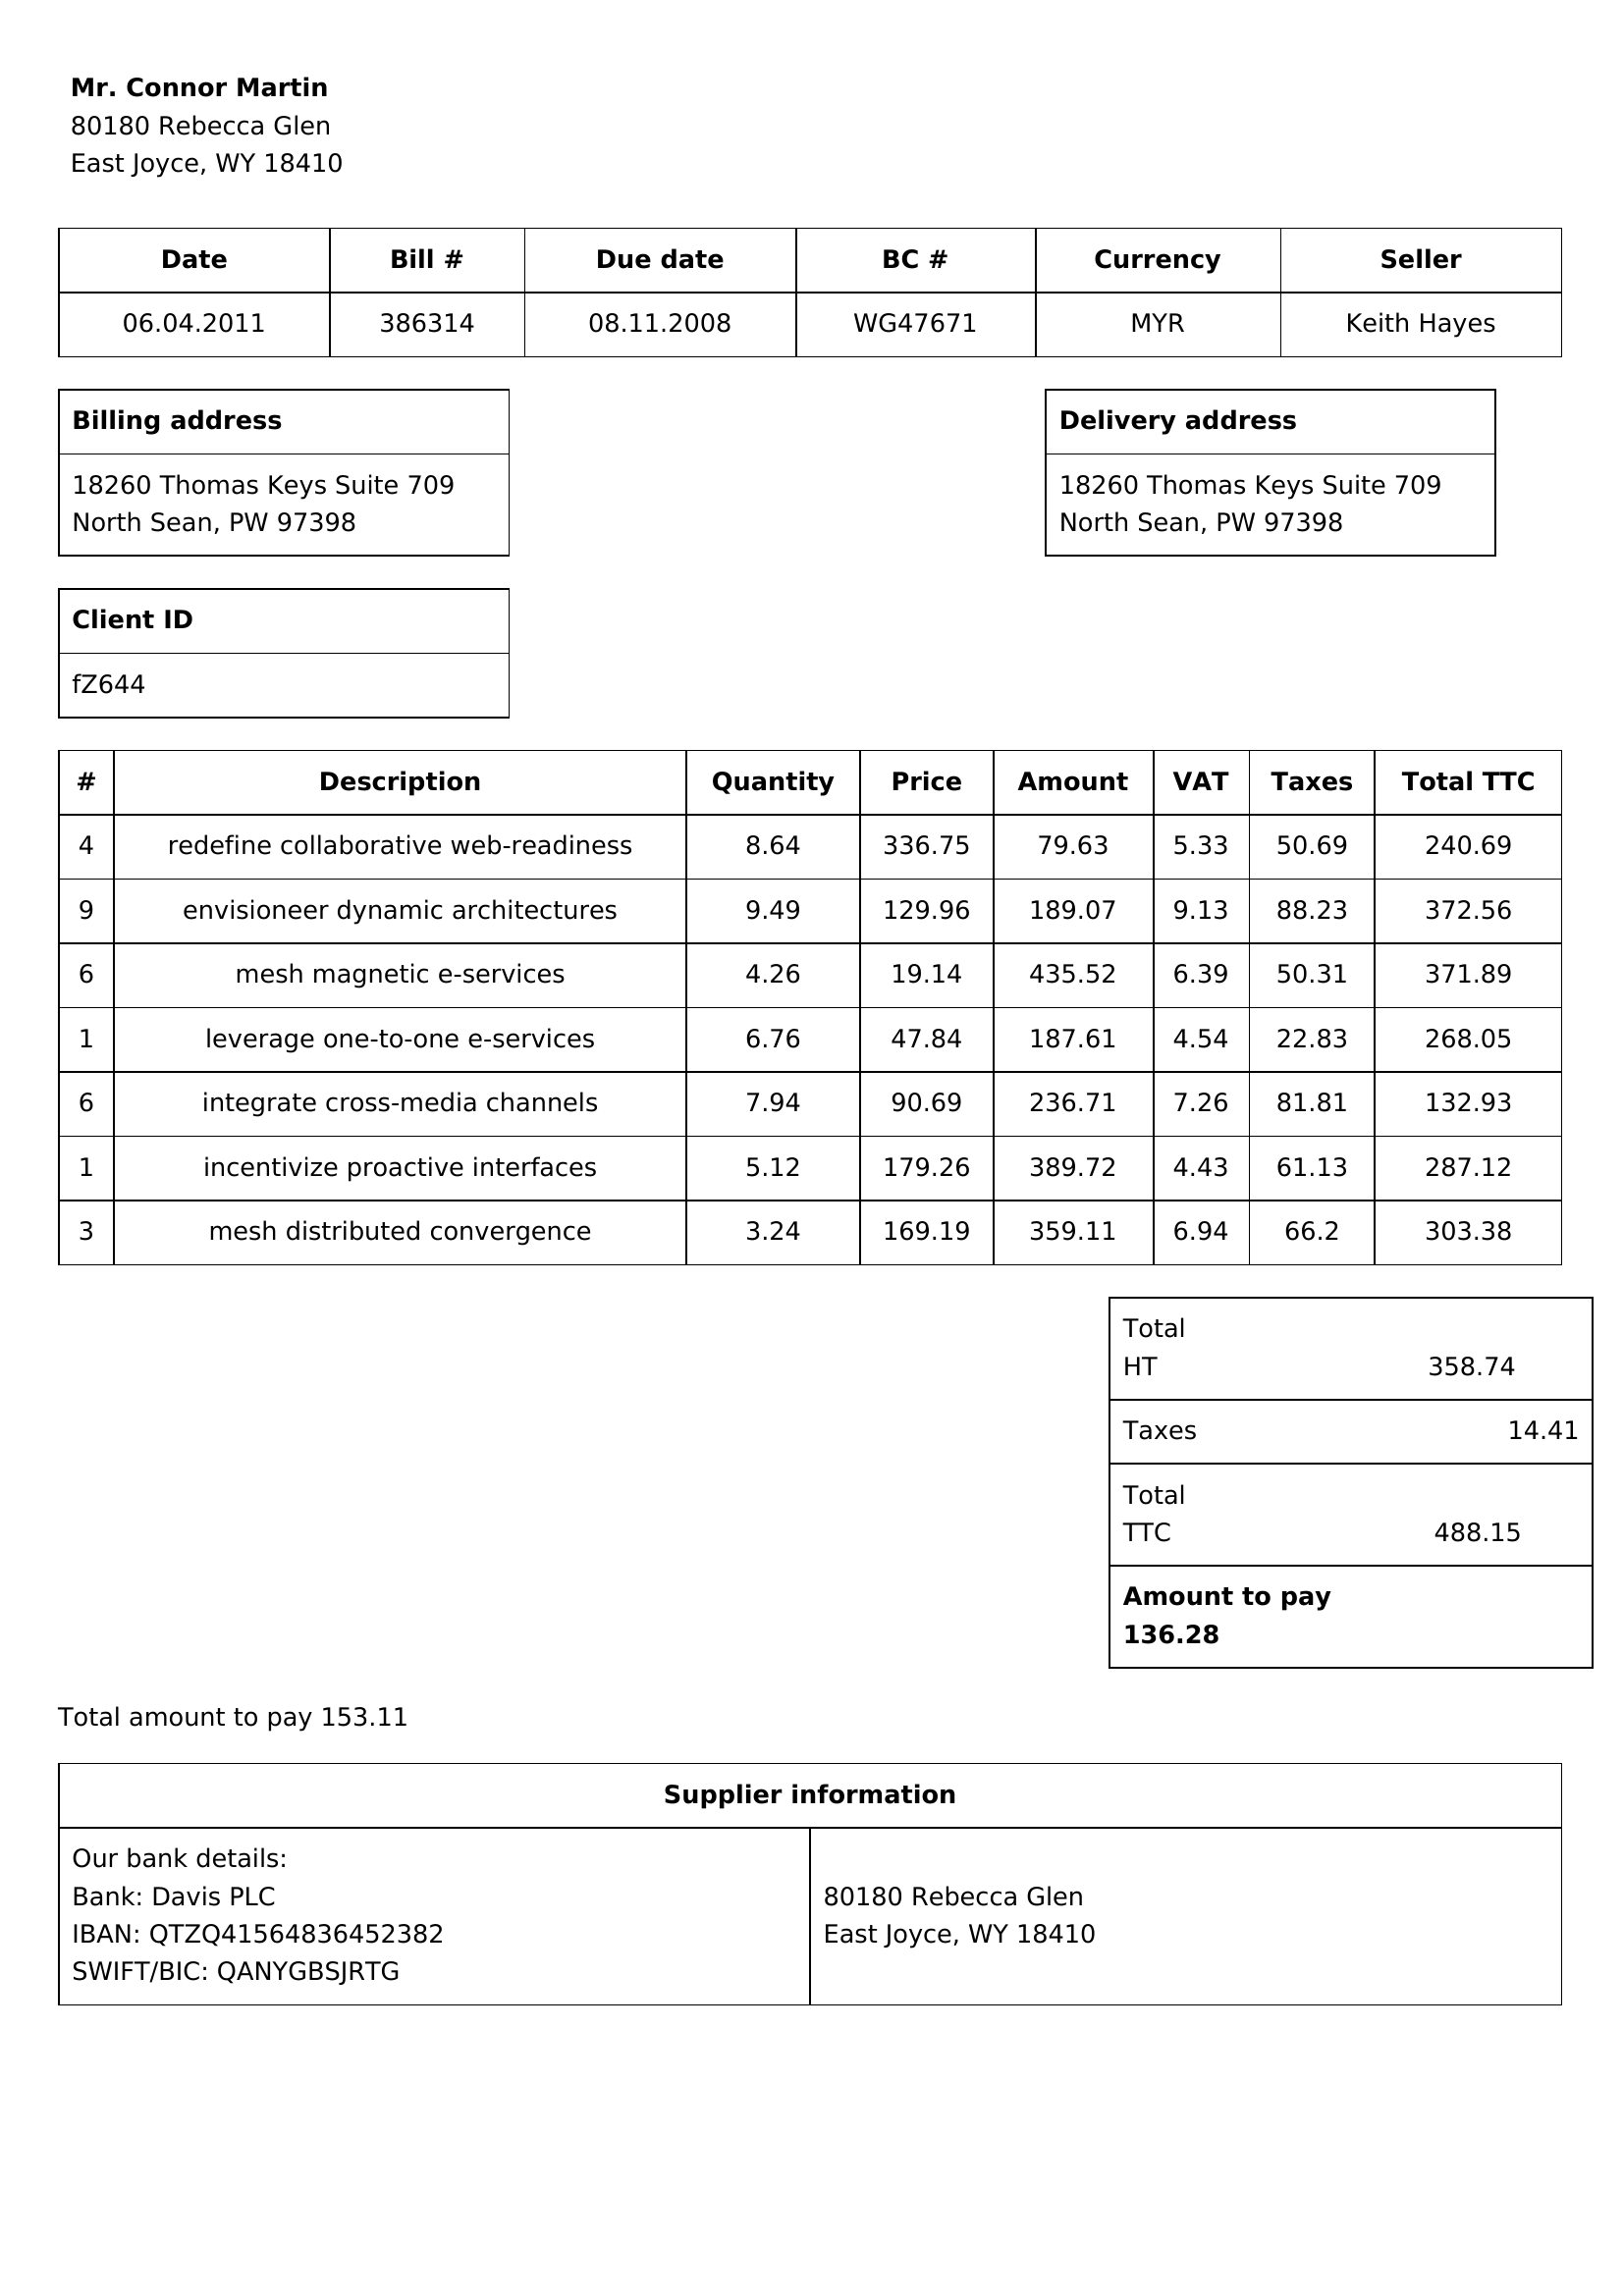

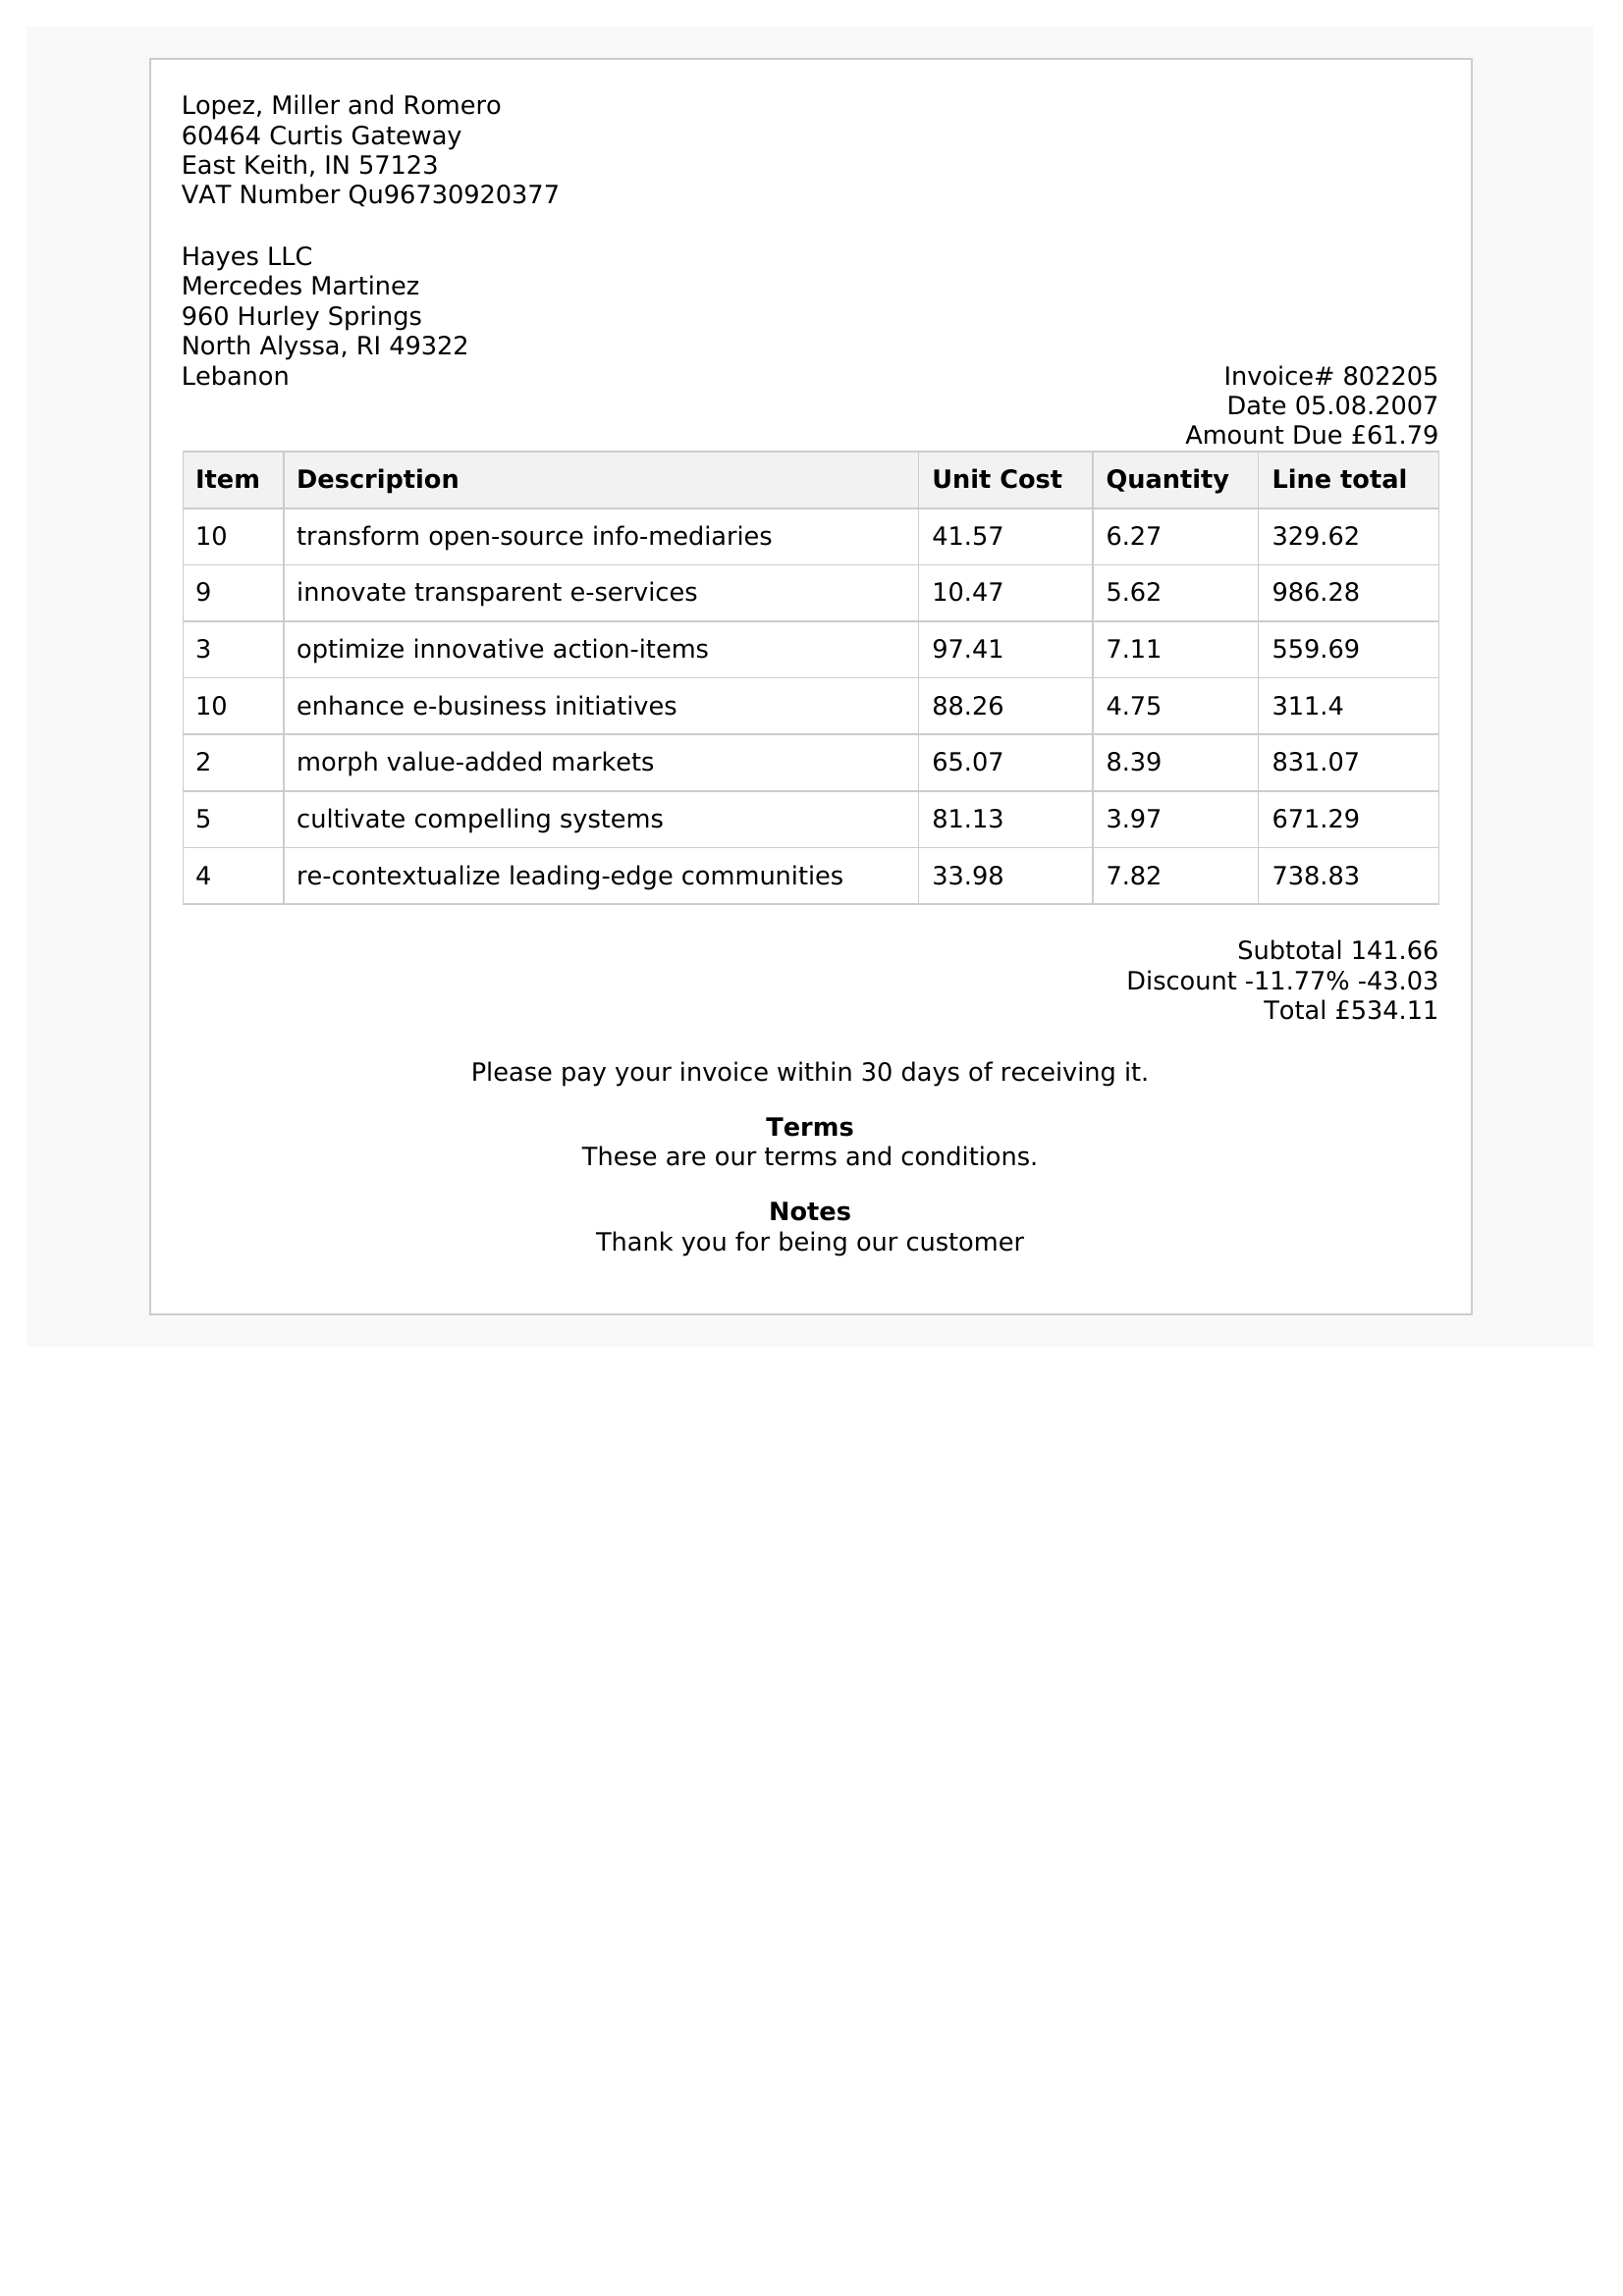

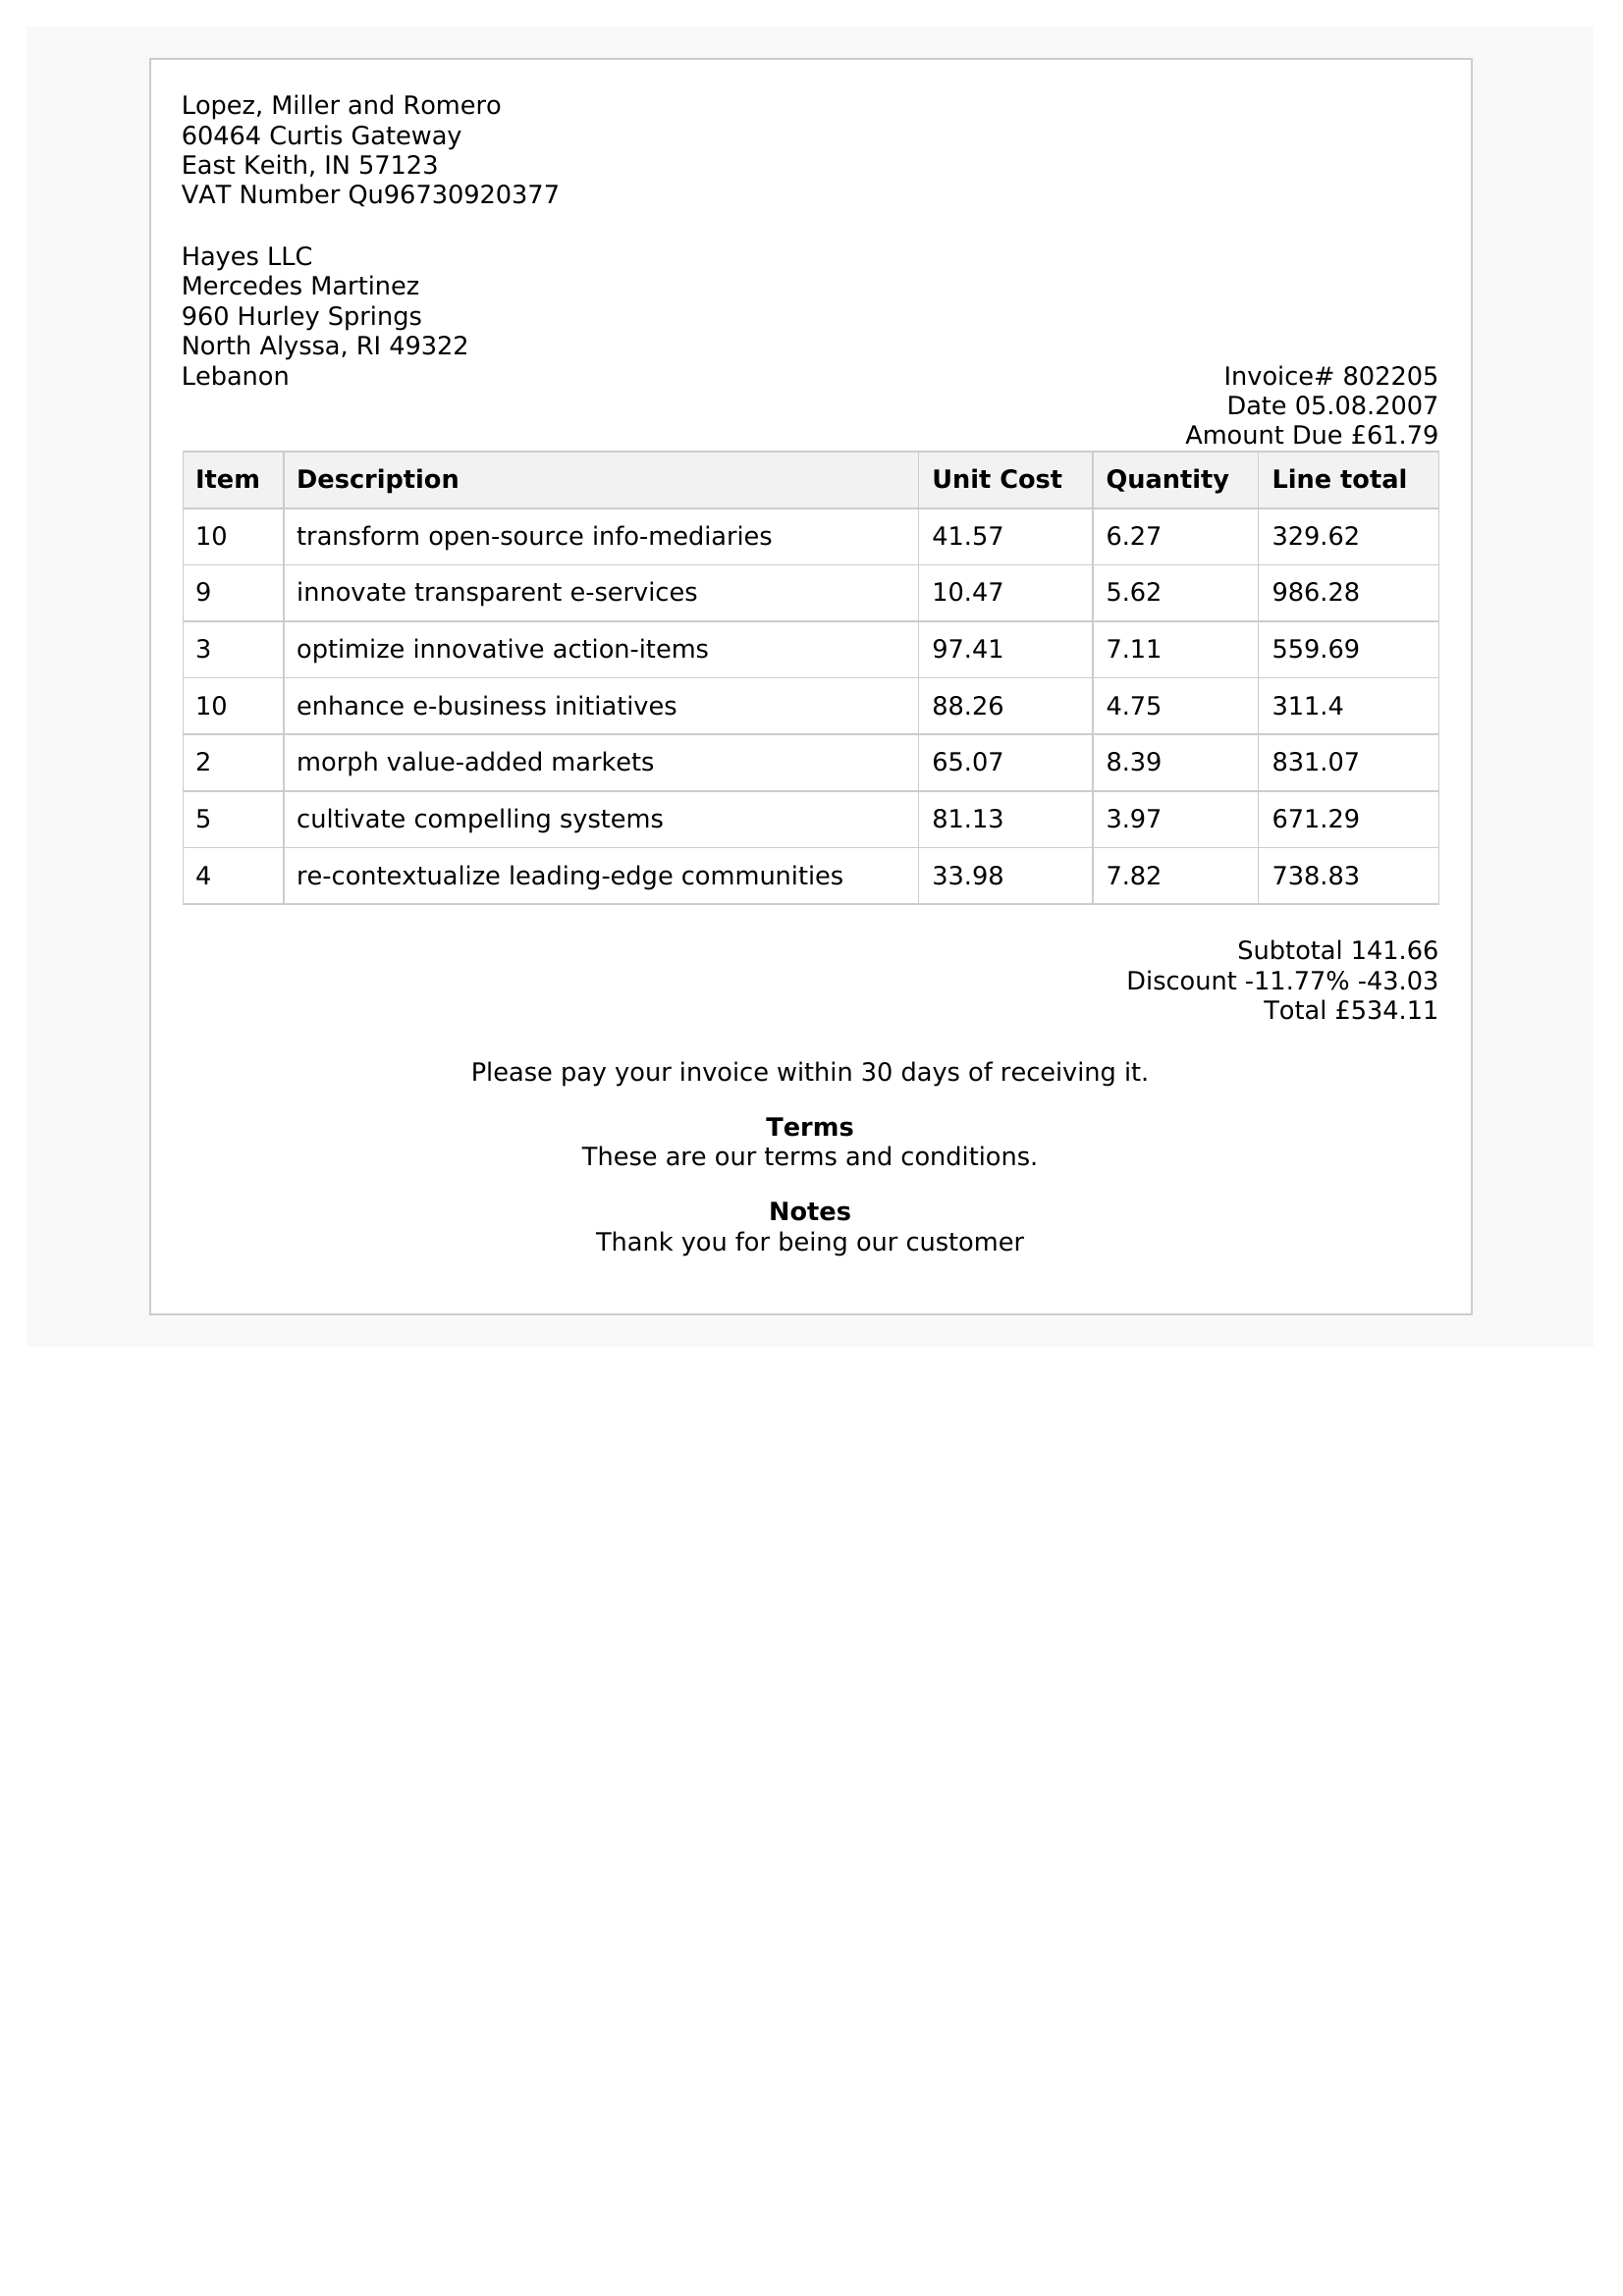

In [11]:
# Use the file_name column of matching rows
file_list = df[df['vendor_name'].str.contains('Hayes', case=False, na=False)]['file_name'].tolist()
show_invoice_images(file_list)
